# Assignment3

จัดทำโดย 

ณัชณศา เลิศมหากูล 65340500021

อนวัช อนุสุเรนทร์ 65340500056

ชัญญาภัค ทรัพย์สวัสดิ์กุล 65340500067

## Reference Dataset

https://archive.ics.uci.edu/dataset/880/support2

ชุดข้อมูลนี้ประกอบด้วยผู้ป่วยวิกฤต 9,105 รายจากศูนย์การแพทย์ 5 แห่งในสหรัฐอเมริกา โดยแต่ละแถวจะเกี่ยวข้องกับบันทึกผู้ป่วยในโรงพยาบาลที่ตรงตามเกณฑ์การรวมและการคัดออกสำหรับโรค 9 ประเภท ได้แก่ ภาวะหายใจล้มเหลวเฉียบพลัน โรคปอดอุดกั้นเรื้อรัง หัวใจล้มเหลว โรคตับ โคม่า มะเร็งลำไส้ใหญ่ มะเร็งปอด ระบบอวัยวะหลายส่วนล้มเหลวร่วมกับมะเร็ง และระบบอวัยวะหลายส่วนล้มเหลวร่วมกับการติดเชื้อในกระแสเลือด

# 1.Reading the data and data description (ทำความเข้าใจ Data)

### Data Description

**Data Types Feature**

**Continuous** : ข้อมูลเชิงตัวเลขที่เป็นค่าต่อเนื่องที่แสดงถึงการวัดต่าง ๆ ได้แก่
  - ประชากรศาสตร์และสภาพร่างกาย: อายุ (`age`), คะแนนทางการแพทย์ เช่น คะแนนโคม่า (`scoma`), คะแนนสรีรวิทยา SUPPORT (`sps`), คะแนน APACHE III (`aps`)
  - ค่าชีวภาพที่วัดในวันที่ 3: ความดันโลหิตเฉลี่ย (`meanbp`), อัตราการเต้นหัวใจ (`hrt`), อัตราการหายใจ (`resp`), อุณหภูมิ (`temp`), อัตราส่วนออกซิเจน PaO2/FiO2 (`pafi`), อัลบูมิน (`alb`), บิลิรูบิน (`bili`), ครีเอตินีน (`crea`), โซเดียม (`sod`), ความเป็นกรดด่างของเลือด (`ph`), ปริมาณปัสสาวะ (`urine`)
  - การประเมินการอยู่รอด: การประเมินการอยู่รอดใน 2 เดือน (`surv2m`) และ 6 เดือน (`surv6m`), ประมาณการของแพทย์ใน 2 เดือน (`prg2m`) และ 6 เดือน (`prg6m`)
  - ต้นทุนและค่ารักษาพยาบาล: ค่าใช้จ่ายในโรงพยาบาล (`charges`), อัตราส่วนต้นทุน (`totcst`), ต้นทุนย่อย (`totmcst`)

**Categorical** : ข้อมูลที่เป็นหมวดหมู่ได้แก่
  - ประชากรศาสตร์: เพศ (`sex`), เชื้อชาติ (`race`), หมวดหมู่โรค (`dzgroup`, `dzclass`), รายได้ (`income`), จำนวนปีการศึกษา (`edu`)
  - ประวัติการเจ็บป่วยและคำสั่งการรักษา: เบาหวาน (`diabetes`), สมองเสื่อม (`dementia`), มะเร็ง (`ca`), คำสั่ง DNR (`dnr`)

**Integer** : ข้อมูลเชิงจำนวนเต็ม ได้แก่
  - วันและจำนวนการเข้ารักษา: จำนวนวันที่อยู่ในโรงพยาบาล (`hday`), จำนวนวันที่เข้าร่วมการศึกษา (`slos`), จำนวนวันติดตามผล (`d.time`)
  - การตรวจทางชีวภาพ: จำนวนเม็ดเลือดขาว (`wblc`), ระดับน้ำตาลกลูโคส (`glucose`), ระดับไนโตรเจนยูเรียในเลือด (`bun`)

หมายเหตุ : มีทั้งหมด 48 Feature


### Import library

In [ ]:
# Fetch a dataset from the UCI Machine Learning Repository
from ucimlrepo import fetch_ucirepo

# Functions for statistical computations, such as Box-Cox transformation
from scipy.stats import boxcox

# Split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split

# Imputation methods for filling in missing values (SimpleImputer and KNNImputer)
from sklearn.impute import SimpleImputer, KNNImputer

# Encode categorical variables into numeric labels
from sklearn.preprocessing import LabelEncoder

# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# Scaling features to a given range (e.g., 0 to 1)
from sklearn.preprocessing import MinMaxScaler

# Hyperparameter tuning using grid search with cross-validation
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning using Randomized Search
from sklearn.model_selection import RandomizedSearchCV

# Performance metrics for classification tasks
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

# Perform cross-validation
from sklearn.model_selection import cross_val_score

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical functions and utilities (e.g., Z-scores, normality tests)
from scipy import stats

# Core library for data manipulation and analysis
import pandas as pd

# Numeric computations (e.g., arrays, matrices, mathematical functions)
import numpy as np

# Utilities for handling files and directories
import shutil
import os

# Machine learning models from Scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score, precision_score

# Calculate the accuracy of a model's predictions
from sklearn.metrics import accuracy_score

# Hyperparameter tuning using Bayesian Search
from skopt import BayesSearchCV

from skopt.space import Real, Integer, Categorical


### Import Data

In [11]:
# Fetch dataset 
support2 = fetch_ucirepo(id=880) 

X = support2.data.features 
y = support2.data.targets 

# Combine features and targets into a single DataFrame, if desired
df = pd.concat([X, y], axis=1)

# metadata 
print(support2.metadata) 

# variable information 
print(support2.variables)

df = pd.read_csv('data.csv', header = None)
df.columns = ['id','age','death','sex','hospdead','slos','d.time','dzgroup','dzclass','num.co','edu','income','scoma','charges','totcst','totmcst','avtisst','race','sps','aps','surv2m','surv6m','hday','diabetes','dementia','ca','prg2m','prg6m','dnr','dnrday','meanbp','wblc','hrt','resp','temp','pafi','alb','bili','crea','sod','ph','glucose','bun','urine','adlp','adls','sfdm2','adlsc']
num_columns = len(df.columns)
print(f"จำนวนคอลัมน์ทั้งหมด: {num_columns}")
df.head()


output_file = 'originall.csv'
df.to_csv(output_file, index=False)

{'uci_id': 880, 'name': 'SUPPORT2', 'repository_url': 'https://archive.ics.uci.edu/dataset/880/support2', 'data_url': 'https://archive.ics.uci.edu/static/public/880/data.csv', 'abstract': "This dataset comprises 9105 individual critically ill patients across 5 United States medical centers, accessioned throughout 1989-1991 and 1992-1994.\nEach row concerns hospitalized patient records who met the inclusion and exclusion criteria for nine disease categories: acute respiratory failure, chronic obstructive pulmonary disease, congestive heart failure, liver disease, coma, colon cancer, lung cancer, multiple organ system failure with malignancy, and multiple organ system failure with sepsis. The goal is to determine these patients' 2- and 6-month survival rates based on several physiologic, demographics, and disease severity information. \nIt is an important problem because it addresses the growing national concern over patients' loss of control near the end of life. It enables earlier deci

## 2.Defining the problem 
 
เป้าหมาย คือ การเรียนรู้จากข้อมูลนี้และคาดการณ์การเสียชีวิตของผู้ป่วย
โดยสร้างแบบจำลองการพยากรณ์จากข้อมูลต่างๆของผู้ป่วยที่มีแนวโน้มเสียชีวิต

วัตถุประสงค์ คือ ความสามารถในการทำนายนี้จะช่วยให้แพทย์และทีมผู้ดูแลสามารถวางแผนการรักษาที่เหมาะสมและจัดลำดับความสำคัญของผู้ป่วยที่มีความเสี่ยงสูงได้อย่างรวดเร็ว ซึ่งเป็นปัจจัยสำคัญที่ช่วยเพิ่มโอกาสการรอดชีวิตและลดการสูญเสียทรัพยากรที่ไม่จำเป็น

**Target Variable:** "death"
- death=0 หมายถึง ไม่ตาย
- death=1 หมายถึง ตาย

**Predictions:** age, sex, scoma, adls, adlsc, num.co etc.
 
**Samples:** ผู้ป่วยที่จะเสียชีวิต


*****จากปัญหาควรจะได้โมเดลที่มี Precision ที่สูงและ Recall ที่โอเค เพื่อจะสามารถทำนายได้อย่างแม่นยำที่สุด และให้การรักษาผู้ป่วยได้ทันถ่วงที

## 3.The distribution of Target

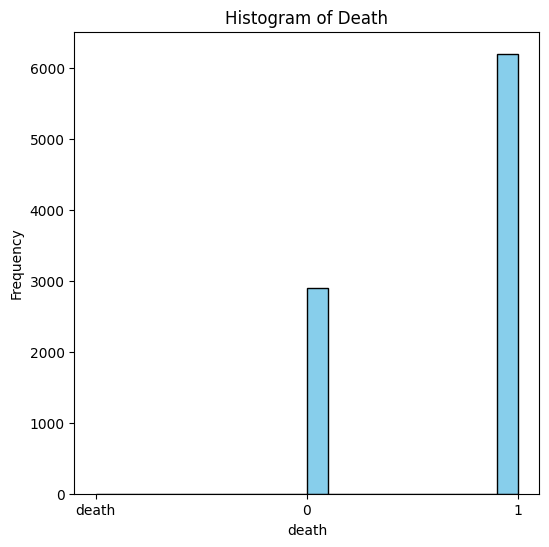

In [40]:
# Plotting Histogram for the 'death' column
plt.figure(figsize=(6, 6))
plt.hist(df['death'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Death')
plt.xlabel('death')
plt.ylabel('Frequency')
plt.show()

From the graph it can be seen that there is a slight left skew, but there are enough number of rows for death=0 as well death=1 for the ML algorithms to learn.

# 4.Basic Data Exploration (การสำรวจข้อมูลเบื้องต้น)

### 4.1 สำรวจประเภทของข้อมูล และจำนวน Missing Value ของแต่ละ Feature

| Data      | Type         | Description                                       | Missing Value( จาก 9100)|
|-----------|--------------|---------------------------------------------------|-------------------------|
| age       | Continuous   | อายุ                                              | no                       |
| sex       | Categorical  | เพศ                                              | no                       |
| dzgroup   | Categorical  | หมวดหมู่ย่อยโรคของผู้ป่วย                             | no                       |
| dzclass   | Categorical  | หมวดหมู่โรคของผู้ป่วย                                | no                       |
| num.co    | Continuous   | จำนวนโรคที่ผู้ป่วยเป็นอยู่ตอนนี้                          | no                       |     
| edu       | Categorical  | จำนวนปีที่มีการศึกษา                                 | yes (1634)               |
| income    | Categorical  | รายได้ของผู้ป่วย                                     | yes (2982)               |
| scoma     | Continuous   | คะแนนความโคม่า                                    | yes (1)                  |
| charges   | Continuous   | ค่าใช้จ่ายในโรงพยาบาล                               | yes (172)                |
| totcst    | Continuous   | อัตราส่วนรวมของต้นทุนต่อค่าใช้จ่าย                       | yes (888)               |
| totmcst   | Continuous   | ต้นทุนการจ่ายต่อเดือน                                 | yes (3475)              |
| avtisst   | Continuous   | ราคาจุลภาคทั้งหมด                                   | yes (82)                |
| race      | Categorical  | เชื้อชาติ                                            | yes (42)                |
| sps       | Continuous   | สนับสนุนคะแนนสรีรวิทยาในวันที่ 3                        | yes (1)                 |
| aps       | Continuous   | คะแนนสรีรวิทยา                                     | yes (1)                 |
| surv2m    | Continuous   | การอยู่รอดใน 2 เดือน ประเมินในวันที่ 3                   | yes (1)                 |
| surv6m    | Continuous   | การอยู่รอดใน 6 เดือน ประเมินในวันที่ 3                   | yes (1)                 |
| hday      | Integer      | วันที่ผู้ป่วยอยู่ในโรงพยาบาล                             | no                      |
| diabetes  | Categorical  | เป็นเบาหวาน?                                       | no                      |
| dementia  | Categorical  | สมองเสื่อม                                         | no                      |
| prg2m     | Continuous   | ประมาณการการอยู่รอด 2 เดือนของแพทย์สำหรับผู้ป่วย        | yes (1649)              |
| prg6m     | Categorical  | ประมาณการการอยู่รอด 6 เดือนของแพทย์สำหรับผู้ป่วย        | yes (1633)              |
| dnr       | Categorical  | อยู่ในคิวที่ต้องกู้ชีพหรือไม่                              | yes (30)                |
| dnrday    | Continuous   | วันที่จะกู้ชีพ                                         | yes (30)                |
| meanbp    | Continuous   | ค่าเฉลี่ยความดันโลหิตหลอดเลือดแดงของผู้ป่วยวัดในวันที่ 3     | yes (1)                 |
| wblc      | Continuous   | จำนวนเม็ดเลือดขาว (เป็นพันเม็ด) ที่วัดได้ในวันที่ 3          | yes (212)               |
| hrt       | Continuous   | อัตราการเต้นของหัวใจของผู้ป่วยที่วัดในวันที่ 3               | yes (1)                 |
| resp      | Continuous   | อัตราการหายใจของผู้ป่วยที่วัดในวันที่ 3                    | yes (1)                 |
| temp      | Continuous   | อุณหภูมิเป็นองศาเซลเซียสวัดในวันที่ 3                    | no                      |
| pafi      | Continuous   | PaO2/FiO2 Ratio                                  | yes (2325)              |
| alb       | Continuous   | ระดับ serum albumin ในวันที่ 3                       | yes (3372)              |
| bili      | Continuous   | ระดับ bilirubin จากการวัดในวันที่ 3                   | yes (2601)              |
| crea      | Continuous   | ระดับ serum creatinine จากการประเมินในวันที่ 3         | yes (67)                |
| sod       | Continuous   | ความเข้มข้นของโซเดียมในซีรั่มในวันที่ 3                   | yes (1)                 |
| ph        | Continuous   | ความเป็นกรดของเลือด                                 | yes (2284)              |
| glucose   | Integer      | ระดับของ Glucose ในวันที่ 3                          | yes (4500)              |
| bun       | Integer      | ระดับไนโตรเจนยูเรียในเลือดวัดในวันที่ 3                   | yes (4352)              |
| urine     | Integer      | ปริมาณปัสสาวะของผู้ป่วยในวันที่ 3                       | yes (4862)              |
| adlp      | Categorical  | ดัชนีการดำรงชีวิตประจำวัน (ADL) ของผู้ป่วย               | yes (5641)              |
| adls      | Continuous   | ดัชนีกิจกรรมการดำรงชีวิตประจำวัน (ADL)                  | yes (2867)              |
| adlsc     | Continuous   | ADL ที่นำมาใส่ได้รับการปรับเทียบให้เป็นตัวแทน              | no                      |
| death     | Continuous   | ตาย                                              | no                      |
| hospdead  | Binary       | ตายที่โรงพยาบาล?                                   | no                      |
| sfdm2     | Categorical  | ระดับความพิการของผู้ป่วย ระดับ 5 หนักสุด                 | yes (1400)              |

### 4.2การสรุปสถิติ  
ใช้สถิติพื้นฐานเพื่อทำความเข้าใจข้อมูล เช่น ค่ามัธยฐาน ค่าสูงสุด และค่าเฉลี่ย


ข้อมูลเชิงตัวเลข (Continuous และ Integer)

| Data           | Mean      | Std. Dev  | Min       | 25%       | 50%       | 75%       | Max         |
|----------------|-----------|-----------|-----------|-----------|-----------|-----------|-------------|
| age            | 62.65     | 15.59     | 18.04     | 52.80     | 64.86     | 73.99     | 101.85      |
| num.co         | 1.87      | 1.34      | 0         | 1         | 2         | 3         | 9           |
| edu            | 11.75     | 3.45      | 0         | 10        | 12        | 14        | 31          |
| scoma          | 12.06     | 24.64     | 0         | 0         | 0         | 9         | 100         |
| charges        | 59,995.79 | 102,648.8 | 1,169     | 9,740     | 25,024    | 64,598    | 1,435,423   |
| totcst         | 30,825.87 | 45,780.82 | 0         | 5,929.57  | 14,452.73 | 36,087.94 | 633,212     |
| totmcst        | 28,828.88 | 43,604.26 | -102.72   | 5,177.40  | 13,223.50 | 34,223.60 | 710,682     |
| avtisst        | 22.61     | 13.23     | 1         | 12        | 19.5      | 31.67     | 83          |
| sps            | 25.53     | 9.90      | 0.20      | 19        | 23.90     | 30.20     | 99.19       |
| aps            | 37.60     | 19.90     | 0         | 23        | 34        | 49        | 143         |
| surv2m         | 0.49      | 0.50      | 0         | 0         | 0         | 1         | 1           |
| surv6m         | 0.28      | 0.45      | 0         | 0         | 0         | 1         | 1           |
| hday           | 8.43      | 7.61      | 0         | 3         | 6         | 13        | 30          |
| meanbp         | 137.57    | 6.03      | 110       | 134       | 137       | 141       | 181         |
| wblc           | 11.22     | 11.36     | 0         | 6.3       | 8.8       | 13.3      | 200         |
| hrt            | 86.67     | 19.18     | 0         | 76        | 85        | 95        | 300         |
| resp           | 19.61     | 5.35      | 0         | 17        | 20        | 22        | 90          |
| temp           | 36.96     | 0.99      | 28.89     | 36.50     | 36.94     | 37.39     | 41.67       |
| pafi           | 282.22    | 101.35    | 0         | 216       | 288       | 354       | 890.38      |
| alb            | 2.86      | 0.59      | 0.2       | 2.6       | 2.9       | 3.2       | 29          |
| bili           | 1.66      | 2.26      | 0         | 0.6       | 1.0       | 1.9       | 63          |
| crea           | 1.68      | 1.47      | 0         | 0.9       | 1.3       | 2.0       | 21.5        |
| sod            | 137.57    | 6.03      | 110       | 134       | 137       | 141       | 181         |
| ph             | 7.42      | 0.08      | 6.83      | 7.38      | 7.42      | 7.47      | 7.77        |
| glucose        | 159.87    | 88.39     | 0         | 103       | 135       | 188       | 1092        |
| bun            | 32.35     | 26.79     | 1         | 14        | 23        | 42        | 300         |
| urine          | 2191.55   | 1455.25   | 0         | 1165.5    | 1968      | 3000      | 9000        |
| adlp           | 1.16      | 1.74      | 0         | 0         | 0         | 2         | 7           |
| adls           | 1.64      | 2.23      | 0         | 0         | 1         | 3         | 7           |
| adlsc          | 1.89      | 2.00      | 0         | 0         | 1         | 3         | 7.07        |
| death          | 0.68      | 0.47      | 0         | 0         | 1         | 1         | 1           |
| hospdead       | 0.26      | 0.44      | 0         | 0         | 0         | 1         | 1           |


การกระจายของข้อมูลเชิงหมวดหมู่ (Categorical)

| Categorical Data | Category              | Count |
|------------------|-----------------------|-------|
| sex              | male                  | 5125  |
|                  | female                | 3980  |
| dzgroup          | ARF/MOSF w/Sepsis     | 3515  |
|                  | CHF                   | 1387  |
|                  | COPD                  | 967   |
|                  | Lung Cancer           | 908   |
|                  | MOSF w/Malig          | 712   |
|                  | Coma                  | 596   |
|                  | Colon Cancer          | 512   |
|                  | Cirrhosis             | 508   |
| dzclass          | ARF/MOSF              | 4227  |
|                  | COPD/CHF/Cirrhosis    | 2862  |
|                  | Cancer                | 1420  |
|                  | Coma                  | 596   |
| income           | under $11k            | 2855  |
|                  | $11-$25k              | 1527  |
|                  | $25-$50k              | 1057  |
|                  | >$50k                 | 684   |
| race             | white                 | 7191  |
|                  | black                 | 1391  |
|                  | hispanic              | 290   |
|                  | other                 | 112   |
|                  | asian                 | 79    |
| ca               | no                    | 5995  |
|                  | metastatic            | 1858  |
|                  | yes                   | 1252  |
| dnr              | no dnr                | 5880  |
|                  | dnr after sadm        | 2956  |
|                  | dnr before sadm       | 239   |
| sfdm2            | <2 mo. follow-up      | 3123  |
|                  | no(M2 and SIP pres)   | 3061  |
|                  | adl>=4 (>=5 if sur)   | 916   |
|                  | SIP>=30               | 564   |
|                  | Coma or Intub         | 41    |

ข้อมูลเชิงหมวดหมู่แบบไบนารี (0 and 1)

| Column    | 0          | 1          |
|-----------|------------|------------|
| death     | 2904       | 6201       |  0 = รอด 1=ตาย
| hospdead  | 6745       | 2360       |  0 = รอด 1=ตาย
| diabetes  | 7327       | 1778       |  0 = ไม่เป็นเบาหวาน 1 = เป็นเบาหวาน
| dementia  | 8809       | 296        |  0 = ไม่สมองเสื่อม 1 = สมองเสื่อม

death = 0 ไม่ตาย death = 1 ตาย

hospdead = 0 ไม่ตาย hospdead = 1 ตาย

diabetes = 0 ไม่เป็นเบาหวาน diabetes = 1 เป็นเบาหวาน

dementia = 0 ไม่สมองเสื่อม dementia = 1 สมองเสื่อม

### ผลการสำรวจข้อมูล

จากการสำรวจพื้นฐานข้างต้น จึงบันทึกการสังเกตและคาดการณ์ column ที่น่าจะเกี่ยวข้องและส่งผลต่อการทำนาย ดังนี้

**ขอบเขต** : เป็นการทำนาย feature ที่คิดว่ามีผลต่อการทำนายผลลัพธ์ แต่ยังไม่ได้ตัดออกจริงเพื่อนำมาใช้ในการเปรียบเทียบกับ

ผลลัพธ์เมื่อใช้โปรแกรมในการพิจารณาเลือกให้ว่าตรงกันหรือไม่

**กำหนดให้**

Selected - คาดการณ์ว่ามีผลต่อการทำนาย target

doubt - ไม่แน่ใจหรือส่งสัยว่าอาจมีผลต่อการทำนาย target

Rejected - ไม่มีผลต่อการทำนาย target

| Data      | Type         | Selected??                                     
|-----------|--------------|---------------------------------------------------|
| age       | Continuous   | อายุ (Selected)                                              | 
| sex       | Categorical  | เพศ (Selected)                                              | 
| dzgroup   | Categorical  | หมวดหมู่ย่อยโรคของผู้ป่วย (doubt)                             | 
| dzclass   | Categorical  | หมวดหมู่โรคของผู้ป่วย (doubt)                               | 
| num.co    | Continuous   | จำนวนโรคที่ผู้ป่วยเป็นอยู่ตอนนี้ (Selected)                          |     
| edu       | Categorical  | จำนวนปีที่มีการศึกษา (Rejected)                                | 
| income    | Categorical  | รายได้ของผู้ป่วย (Rejected)                                     | 
| scoma     | Continuous   | คะแนนความโคม่า (Selected)                                    | 
| charges   | Continuous   | ค่าใช้จ่ายในโรงพยาบาล (Rejected)                               | 
| totcst    | Continuous   | อัตราส่วนรวมของต้นทุนต่อค่าใช้จ่าย (Rejected)                        | 
| totmcst   | Continuous   | ต้นทุนการจ่ายต่อเดือน (Rejected)                                  | 
| avtisst   | Continuous   | ราคาจุลภาคทั้งหมด (Rejected)                                   | 
| race      | Categorical  | เชื้อชาติ (doubt)                                            | 
| sps       | Continuous   | สนับสนุนคะแนนสรีรวิทยาในวันที่ 3 (Selected)                        | 
| aps       | Continuous   | คะแนนสรีรวิทยา (Selected)                                     | 
| surv2m    | Continuous   | การอยู่รอดใน 2 เดือน ประเมินในวันที่ 3 (Selected)                   | 
| surv6m    | Continuous   | การอยู่รอดใน 6 เดือน ประเมินในวันที่ 3 (Selected)                   | 
| hday      | Integer      | วันที่ผู้ป่วยอยู่ในโรงพยาบาล (Selected)                             | 
| diabetes  | Categorical  | เป็นเบาหวาน? (doubt)                                       | 
| dementia  | Categorical  | สมองเสื่อม (doubt)                                        | 
| prg2m     | Continuous   | ประมาณการการอยู่รอด 2 เดือนของแพทย์สำหรับผู้ป่วย (Selected)        | 
| prg6m     | Categorical  | ประมาณการการอยู่รอด 6 เดือนของแพทย์สำหรับผู้ป่วย (Selected)       | 
| dnr       | Categorical  | อยู่ในคิวที่ต้องกู้ชีพหรือไม่ (Selected)                              | 
| dnrday    | Continuous   | วันที่จะกู้ชีพ (doubt)                                       | 
| meanbp    | Continuous   | ค่าเฉลี่ยความดันโลหิตหลอดเลือดแดงของผู้ป่วยวัดในวันที่ 3 (Selected)     | 
| wblc      | Continuous   | จำนวนเม็ดเลือดขาว (เป็นพันเม็ด) ที่วัดได้ในวันที่ 3 (Selected)         | 
| hrt       | Continuous   | อัตราการเต้นของหัวใจของผู้ป่วยที่วัดในวันที่ 3 (Selected)               | 
| resp      | Continuous   | อัตราการหายใจของผู้ป่วยที่วัดในวันที่ 3 (Selected)                    | 
| temp      | Continuous   | อุณหภูมิเป็นองศาเซลเซียสวัดในวันที่ 3 (doubt)                   | 
| pafi      | Continuous   | PaO2/FiO2 Ratio (Selected)                                  | 
| alb       | Continuous   | ระดับ serum albumin ในวันที่ 3 (doubt)                      | 
| bili      | Continuous   | ระดับ bilirubin จากการวัดในวันที่ 3 (doubt)                  | 
| crea      | Continuous   | ระดับ serum creatinine จากการประเมินในวันที่ 3 (doubt)        | 
| sod       | Continuous   | ความเข้มข้นของโซเดียมในซีรั่มในวันที่ 3 (doubt)                  | 
| ph        | Continuous   | ความเป็นกรดของเลือด (doubt)                                 | 
| glucose   | Integer      | ระดับของ Glucose ในวันที่ 3 (Selected)                          | 
| bun       | Integer      | ระดับไนโตรเจนยูเรียในเลือดวัดในวันที่ 3 (Selected)                   | 
| urine     | Integer      | ปริมาณปัสสาวะของผู้ป่วยในวันที่ 3  (Selected)                      | 
| adlp      | Categorical  | ดัชนีการดำรงชีวิตประจำวัน (ADL) ของผู้ป่วย (Selected)               | 
| adls      | Continuous   | ดัชนีกิจกรรมการดำรงชีวิตประจำวัน (ADL) (Selected)                  | 
| adlsc     | Continuous   | ADL ที่นำมาใส่ได้รับการปรับเทียบให้เป็นตัวแทน (doubt)             | 
| death     | Continuous   | ตาย (-)                                              | 
| hospdead  | Binary       | ตายที่โรงพยาบาล? (Selected)                                   | 
| sfdm2     | Categorical  | ระดับความพิการของผู้ป่วย ระดับ 5 หนักสุด (Selected)                 | 

#### Cleaning Data

จัดการ Data ด้วยการตัด column ที่มี missing value มากกว่า 40% และตัด row ที่มี missing value มากกว่า 30% 

เพราะปริมาณข้อมูลที่สูญหายมากเกินไป จึงไม่สามารถใช้วิธีนำมาเติม Missing Value ได้

In [ ]:
# เก็บจำนวนคอลัมน์และแถวก่อนการลบ
cols_before = df.columns
rows_before = df.shape[0]

# ลบคอลัมน์ที่มีค่าหายไปมากกว่า 40%
df = df.loc[:, df.isnull().mean() < 0.4]
cols_after = df.columns

# ลบแถวที่มีค่าหายไปมากกว่า 30%
df = df.dropna(thresh=len(df.columns) * 0.7)
rows_after = df.shape[0]

# คำนวณจำนวนคอลัมน์ที่ถูกลบออก
cols_dropped = set(cols_before) - set(cols_after)

# คำนวณจำนวนแถวที่ถูกลบ
rows_dropped = rows_before - rows_after

# แสดงผลลัพธ์
print("cols_before : ",cols_before)
print("cols_After : ",cols_after)
print("คอลัมน์ที่ถูกลบ:")
print(cols_dropped)
print("\nคอลัมน์ที่ยังคงอยู่:")
print(df.columns)
print(f"\nจำนวนแถวที่ถูกลบ: {rows_dropped}")
print("\nข้อมูลตัวอย่างหลังการลบ:")

#ปริ้นตารางมาเช็ค
df.head()

output_file = 'cleaning.csv'
df.to_csv(output_file, index=False)

cols_before :  Index(['id', 'age', 'death', 'sex', 'hospdead', 'slos', 'd.time', 'dzgroup',
       'dzclass', 'num.co', 'edu', 'income', 'scoma', 'charges', 'totcst',
       'totmcst', 'avtisst', 'race', 'sps', 'aps', 'surv2m', 'surv6m', 'hday',
       'diabetes', 'dementia', 'ca', 'prg2m', 'prg6m', 'dnr', 'dnrday',
       'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea',
       'sod', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adls', 'sfdm2',
       'adlsc'],
      dtype='object')
cols_After :  Index(['id', 'age', 'death', 'sex', 'hospdead', 'slos', 'd.time', 'dzgroup',
       'dzclass', 'num.co', 'edu', 'income', 'scoma', 'charges', 'totcst',
       'totmcst', 'avtisst', 'race', 'sps', 'aps', 'surv2m', 'surv6m', 'hday',
       'diabetes', 'dementia', 'ca', 'prg2m', 'prg6m', 'dnr', 'dnrday',
       'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea',
       'sod', 'ph', 'adls', 'sfdm2', 'adlsc'],
      dtype='object')
คอลัมน์ที่ถูกลบ:
{'bun', 'g

### สรุปผล 

ถูกลบไปจำนวน 4 column ได้แก่ {'bun', 'glucose', 'urine', 'adlp'} และถูกตัดออก 2 row

จำนวน column ที่เหลืออยู่ดังนี้

        ['id', 'age', 'death', 'sex', 'hospdead', 'slos', 'd.time', 'dzgroup',
       'dzclass', 'num.co', 'edu', 'income', 'scoma', 'charges', 'totcst',
       'totmcst', 'avtisst', 'race', 'sps', 'aps', 'surv2m', 'surv6m', 'hday',
       'diabetes', 'dementia', 'ca', 'prg2m', 'prg6m', 'dnr', 'dnrday',
       'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea',
       'sod', 'ph', 'adls', 'sfdm2', 'adlsc']

### Plot Graph

พลอตกราฟเพื่อดูการกระจายตัวของข้อมูล เพื่อดูความสมมาตรและความเบ้ของข้อมูล โดย
- ตัวแปรเชิงหมวดหมู่: บาร์พล็อต
- ตัวแปรต่อเนื่อง: ฮิสโทแกรมและบ็อกซ์พล็อต

#### 5.1 แสดงภาพการกระจายตัวของตัวแปร Categorical Predictor ทั้งหมดในข้อมูลโดยใช้กราฟแท่ง

Categorical Predictors:

'sex', 'dzgroup', 'dzclass', 'income', 'race', 'ca', 'dnr', 'sfdm2', 'diabetes', 'dementia', 'prg6m'

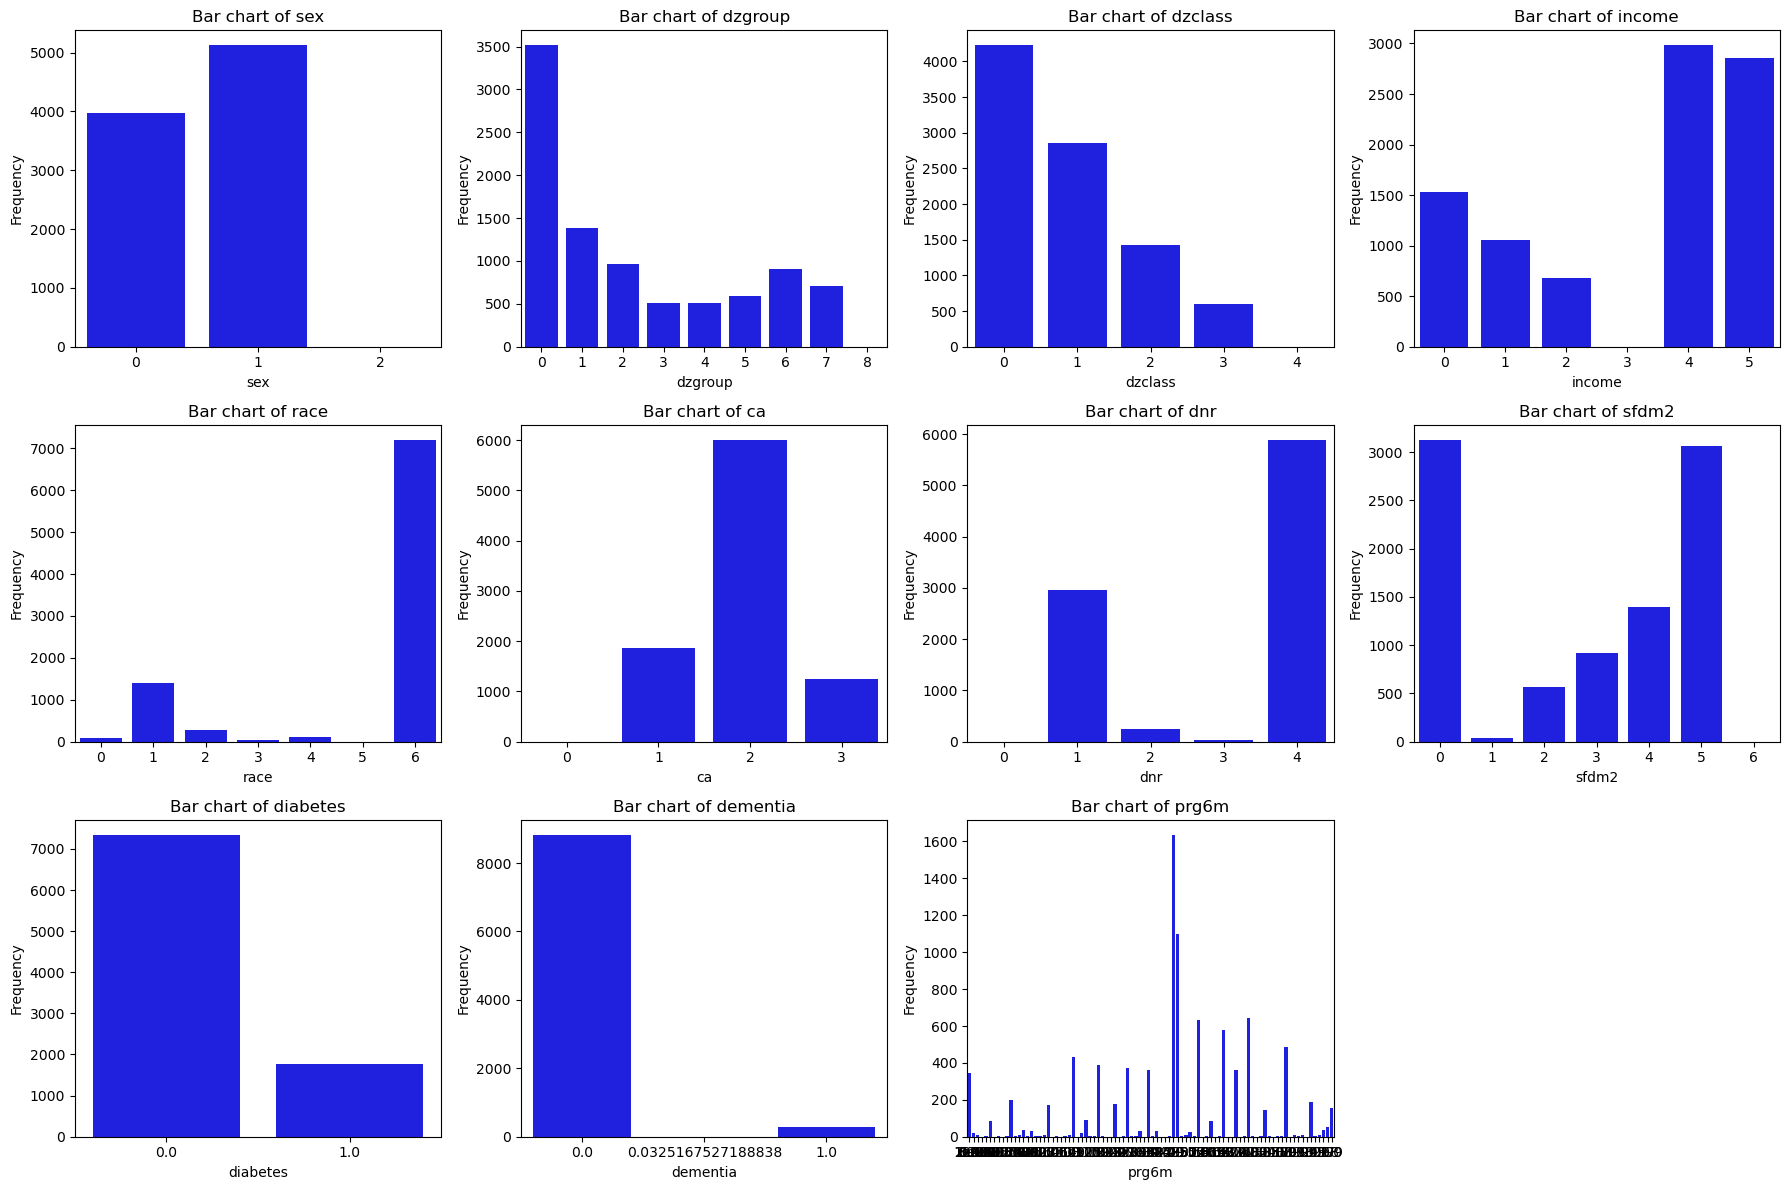

In [57]:
# Load the data from the uploaded file
file_path = './csv/filled_data.csv'
data = pd.read_csv(file_path)

# List of specific columns to plot
columns_to_plot = ['sex', 'dzgroup', 'dzclass', 'income', 'race', 'ca', 'dnr', 'sfdm2', 'diabetes', 'dementia', 'prg6m']

# Set the number of rows and columns for subplots
n_cols = 4
n_rows = (len(columns_to_plot) // n_cols) + 1

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plot bar plots for each specified column with blue color
for i, column in enumerate(columns_to_plot):
    sns.countplot(data=data, x=column, ax=axes[i], color='blue')
    axes[i].set_title(f'Bar chart of {column}')
    axes[i].set_ylabel('Frequency')

# Remove any extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

#### Bar Charts Interpretation

Interpretation

- dzgroup: The highest frequency is concentrated in category '0', with frequencies decreasing for higher categories. 

  This indicates a right skew (positive skew), as most values are on the left side of the distribution.

- dzclass: Categories '0' and '1' have the most data points, with frequencies tapering off for higher categories. 
 
  This shows a right skew, as the majority of values are in the lower categories.

- Income: The highest counts are in categories '4' and '5', with lower counts in the smaller categories. 

  This results in a left skew (negative skew), as more data points fall in the higher categories.

- Race: Most data points are in category '6', with very low frequencies in other categories. 

  This produces a right skew since the distribution is concentrated on the highest category.

- Ca: The distribution peaks at categories '1' and '2', with fewer counts in '0' and '3'. This creates a slight right skew, 

  as more values are clustered toward the lower to mid-categories.

- dnr: The majority of values are in category '4', with very few in other categories. This chart has a right skew, 
  
  as most of the data is concentrated in the highest category.

- diabetes: The majority of values are in category '0', indicating a right skew, as most individuals 

  do not have diabetes (assuming '0' represents absence of diabetes).

- dementia: Most data points are clustered in category '0', with very few in '1', suggesting a right skew, 

  as most values are in the lower category.

- prg6m: This chart shows a spread across many categories with a majority in the lower values but also 

  significant peaks throughout. It’s right-skewed, as values generally taper off toward higher categories.

Whenever in doubt, always investigate the column further.

Selected Categorical Variables: Both the categorical variables are selected for further analysis.

- 'sex' : Selected
- 'dzgroup' : Selected (Doubt)
- 'dzclass' : Selected (Doubt)
- 'income' : Selected (Doubt)
- 'race' : Selected (Doubt)
- 'ca' : Selected (Doubt)
- 'dnr' : Selected (Doubt)
- 'sfdm2' : Selected
- 'diabetes' : Selected (Doubt)
- 'dementia' : Selected (Doubt)
- 'prg6m' : Selected (Doubt)

#### 5.2 แสดงภาพการกระจายตัวของตัวแปร Continuous Predictor ทั้งหมดในข้อมูลโดยใช้ฮิสโทแกรม

Based on the Basic Data Exploration, Four continuous predictor variables were found 

'age', 'death', 'hospdead', 'slos', 'd.time', 'num.co', 'edu', 'income', 'scoma', 'charges', 'totcst',

'totmcst', 'avtisst', 'sps', 'aps', 'surv2m', 'surv6m', 'hday', 'prg2m', 'dnrday',

'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea','sod', 'ph', 'adls', 'adlsc'

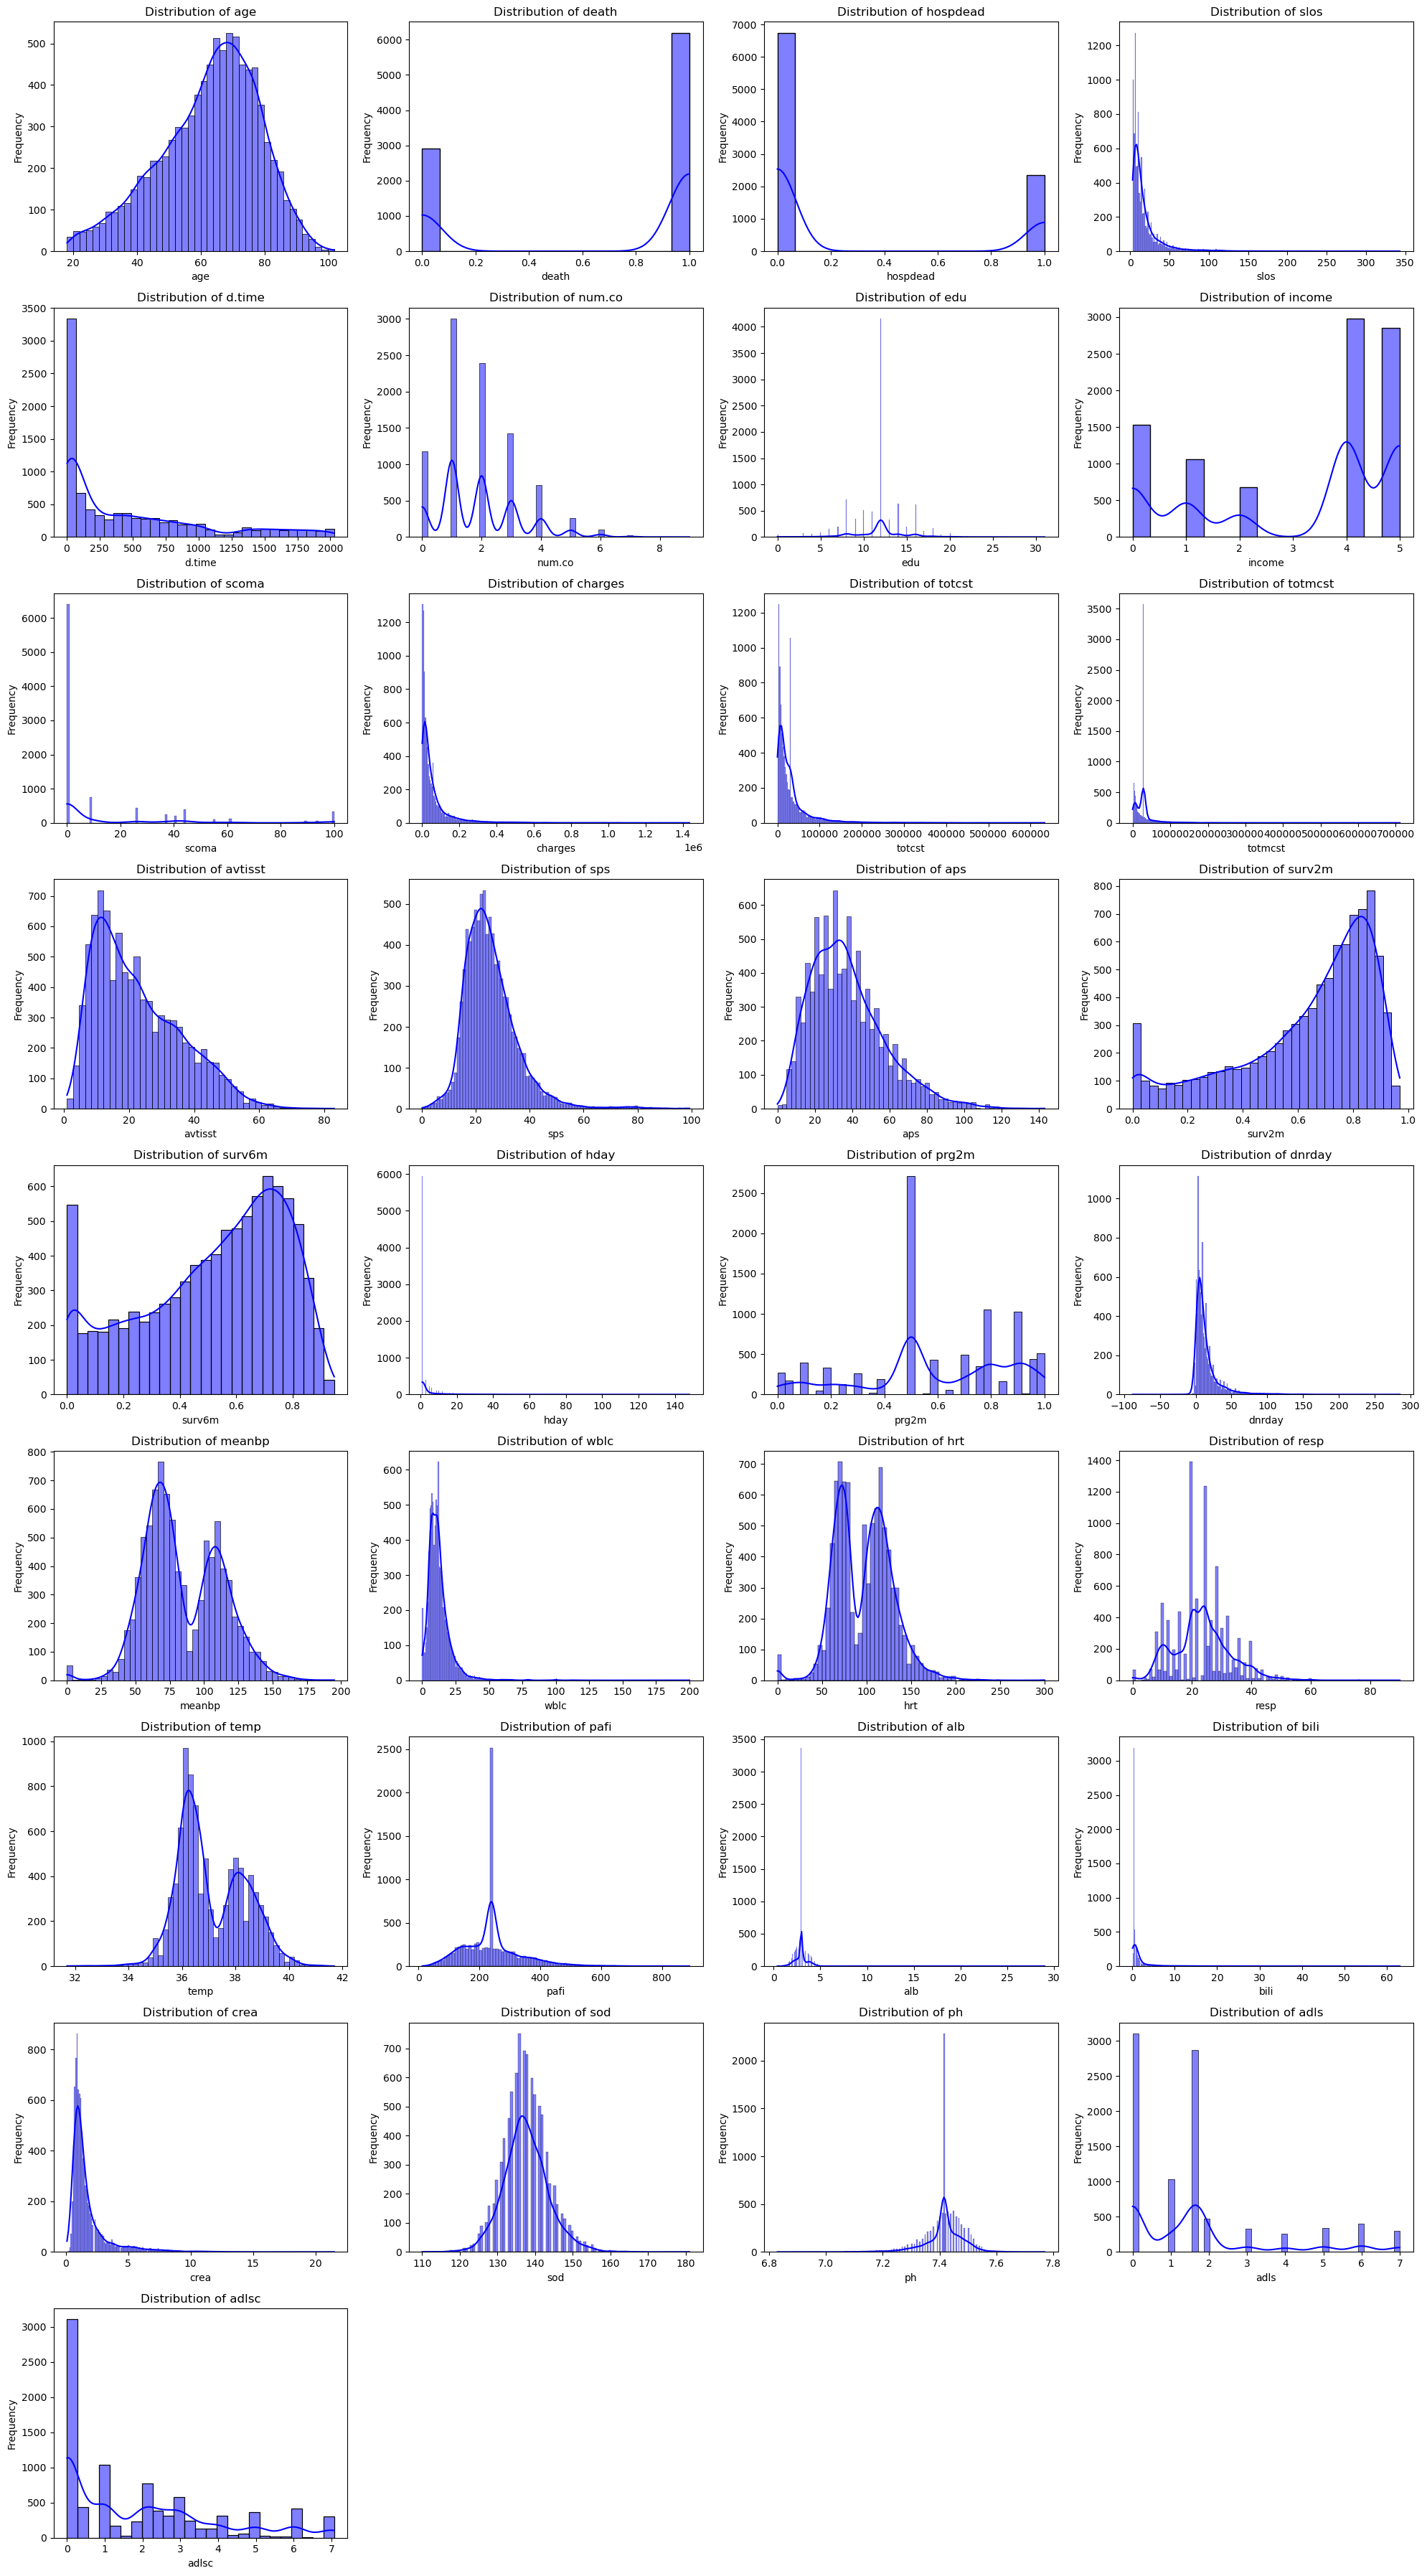

In [58]:
# Load the data from the uploaded file
file_path = './csv/filled_data.csv'
data = pd.read_csv(file_path)

# List of columns for which to plot histograms
columns_to_plot = [
    'age', 'death', 'hospdead', 'slos', 'd.time', 'num.co', 'edu', 'income', 
    'scoma', 'charges', 'totcst', 'totmcst', 'avtisst', 'sps', 'aps', 'surv2m', 
    'surv6m', 'hday', 'prg2m', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 
    'pafi', 'alb', 'bili', 'crea', 'sod', 'ph', 'adls', 'adlsc'
]

# Set the number of rows and columns for subplots
n_cols = 4
n_rows = (len(columns_to_plot) // n_cols) + 1

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plot histograms for each specified column
for i, column in enumerate(columns_to_plot):
    sns.histplot(data[column], kde=True, ax=axes[i], color='blue')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_ylabel('Frequency')

# Remove any extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [60]:
# Load the data from the uploaded file
file_path = './csv/filled_data.csv'
data = pd.read_csv(file_path)

# List of columns to plot outliers for
columns_to_plot = [
    'age', 'hospdead', 'slos', 'd.time', 'num.co', 'edu', 'income', 
    'scoma', 'charges', 'totcst', 'totmcst', 'avtisst', 'sps', 'aps', 'surv2m', 
    'surv6m', 'hday', 'prg2m', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 
    'pafi', 'alb', 'bili', 'crea', 'sod', 'ph', 'adls', 'adlsc'
]

# Set the number of rows and columns for subplots
n_cols = 4
n_rows = (len(columns_to_plot) // n_cols) + 1

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plot box plots for each specified column
for i, column in enumerate(columns_to_plot):
    sns.boxplot(data[column], ax=axes[i], color='blue')
    axes[i].set_title(f'Box plot of {column}')
    axes[i].set_xlabel('')

# Remove any extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

c:\Users\suwat\jupyter notebook\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\suwat\jupyter notebook\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\suwat\jupyter notebook\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\s

#### Histogram Interpretation

Interpretation

Selected Continuous Variables:

- age: การกระจายข้อมูลของอายุมีแนวโน้มเบี้ยวเล็กน้อยในทิศทางบวก มี outliers อยู่ในช่วงอายุสูงสุด ซึ่งอาจเป็นกลุ่มคนอายุมากที่สุดในข้อมูล Selected 

- hospdead: มีลักษณะการกระจายคล้าย death โดยเป็นข้อมูลทวิภาคเช่นกัน จึงไม่มี outliers Selected 

- slos: การกระจายข้อมูลแสดงค่าที่กระจุกตัวอยู่ในช่วงกลาง แต่มี outliers อยู่ทางด้านขวา (ค่า slos สูง) Selected (Doubt)
 
  แสดงว่ามีบางกรณีที่มีการรักษาที่ยาวนานกว่าค่าเฉลี่ย Selected (Doubt)

- d.time: ค่าการกระจายของ d.time มี outliers อยู่ในช่วงค่าที่สูง แสดงถึงกรณีที่มีระยะเวลาเกินค่าเฉลี่ยอย่างมาก Selected (Doubt)

- num.co: จำนวนร่วม (num.co) มีการกระจายค่าอยู่ในช่วงกึ่งกลาง แต่มี outliers ในค่าเลขสูงๆ ที่อาจแสดงถึงกรณีร่วมที่สูงกว่าปกติ Selected (Doubt)

- edu: การกระจายของระดับการศึกษาเป็นค่าทวิภาคหลายระดับ มี outliers เล็กน้อยในบางช่วง Selected (Doubt)

- income: ข้อมูลรายได้กระจุกตัวในระดับรายได้บางช่วง แต่มี outliers ที่แสดงถึงรายได้สูงมาก Selected 

- scoma: ค่าคะแนน scoma กระจายเป็นช่วงสั้นๆ โดยมี outliers ที่สูงกว่าค่ากลาง ซึ่งบ่งบอกถึงกรณีที่อาการของผู้ป่วยมีคะแนนสูง Selected (Doubt)

- charges: ค่า charges กระจุกตัวในช่วงกลางของกราฟ แต่มี outliers สูงมากในด้านขวาของกราฟ ซึ่งอาจเป็นค่าใช้จ่ายที่สูงกว่าเฉลี่ยมาก Selected (Doubt)

- totcst และ totmcst: การกระจายของค่า totcst และ totmcst มี outliers ที่สูงในช่วงบน 

  ซึ่งอาจแสดงถึงค่าใช้จ่ายในการรักษาที่มากกว่าเฉลี่ย Selected (Doubt)

- avtisst: ค่าของ avtisst กระจายอยู่ในช่วงกลาง แต่มี outliers สูงมากด้านขวา ซึ่งอาจเป็นค่าสถิติที่สูงเกินปกติ Selected (Doubt)

- sps และ aps: การกระจายของค่า sps และ aps ค่อนข้างสม่ำเสมอ แต่มี outliers ที่ค่าต่ำสุดและสูงสุด Selected (Doubt)

- surv2m และ surv6m: ค่า survivability ใน 2 และ 6 เดือน มีการกระจายค่าที่ค่อนข้างคล้ายคลึงกัน โดยมีค่า outliers ในระดับ survivability ที่ต่ำ Selected 

- hday: ข้อมูล hday มีการกระจายค่อนข้างกว้าง โดยมี outliers ที่ค่า hday สูงๆ Selected (Doubt)

- prg2m: ค่าคะแนน prg2m มีการกระจายอยู่ในช่วงกลาง โดยมี outliers ที่สูงเกินกว่าเฉลี่ย Selected (Doubt)

- dnrday: การกระจายข้อมูลค่อนข้างแน่นในช่วงกลาง มี outliers ในระดับสูงบางส่วน Selected (Doubt)

- meanbp, wblc, hrt, resp, temp: ตัวแปรเหล่านี้ส่วนใหญ่มีการกระจายค่าที่ค่อนข้างแคบ มี outliers 

  ที่ระดับบนสุดและล่างสุดที่แสดงถึงค่าความดันหรือค่าอื่นๆ ที่ผิดปกติ Selected (Doubt)

- pafi, alb, bili, crea, sod, ph: ตัวแปรทางคลินิกเหล่านี้มีการกระจายค่าที่เบี้ยวเล็กน้อยหรือแสดงค่าที่แตกต่างจากค่าปกติ 

  โดยมี outliers ที่ระดับค่าที่สูงหรือต่ำกว่าเฉลี่ยมาก Selected (Doubt)

- adls และ adlsc: การกระจายค่าของคะแนนการทำกิจวัตรประจำวัน (ADLs) อยู่ในช่วงกึ่งกลาง มี outliers ที่ค่าคะแนนต่ำกว่าปกติในบางกรณี Selected 

# 6.Outlier treatment

#### Data Transformation and Extraction (การแปลงและการดึงข้อมูล)


### 6.1 เปลี่ยน Feature ที่ Data เป็นประเภท Catagorical เป็น Numerical
เปลี่ยน data ที่ยังเป็น type อื่นที่ไม่ใช่  numeric ให้เป็น numeric เพื่อสามารถใช้งานร่วมกันกับ Target ได้

In [42]:
#เลือก Column ที่มั่นใจว่าไม่ใช่ Numeric
categorical_columns = ['sex','income','race','ca', 'dzgroup', 'dzclass', 'dnr' , 'sfdm2'] 
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder() # ใช้การ Encoder ในการแปลง
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le
print(f"Categorical columns: {categorical_columns}")
df[categorical_columns].head()


output_file = 'cat_to_Num.csv'
df.to_csv(output_file, index=False)


Categorical columns: ['sex', 'income', 'race', 'ca', 'dzgroup', 'dzclass', 'dnr', 'sfdm2']


- แปลง data ที่เป็น string ของตัวเลขให้เป็น numeric 

In [43]:
# แปลงคอลัมน์ที่ควรเป็นตัวเลขทั้งหมด
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # แปลงเป็นตัวเลข ถ้าไม่สามารถแปลงได้จะกลายเป็น NaN
    
output_file = 'string_to_num.csv'
df.to_csv(output_file, index=False)


### 6.2 ตัดข้อมูลที่ไม่เหมาะสม และ กำจัด Outliner ออก


Handle Outliers: The handle_outliers function takes the option parameter to decide how to deal with outliers:

- Delete: Removes the outliers if they are less than 5% of the dataset.
- Impute: Replaces outliers with the median value of that column.
- Replace: Similar to impute but can be customized further.

Loop Through Columns: The last loop applies the selected option to each specified column.

โดยตรวจสอบ Feature ที่มี Outliner และนำค่าออกโดยใช้วิธี Standard Deviation-based Method

In [ ]:
# Load the data
file_path = './csv/filled_data.csv'
data = pd.read_csv(file_path)

# Function to identify outliers using the standard deviation method
def identify_outliers(df, column):
    mean = df[column].mean()
    std_dev = df[column].std()
    threshold = 3  # You can adjust this threshold as necessary
    lower_bound = mean - threshold * std_dev
    upper_bound = mean + threshold * std_dev
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Function to handle outliers
def handle_outliers(df, column, option='delete'):
    outliers = identify_outliers(df, column)
    
    if option == 'delete':
        # Option 1: Delete outlier records
        if len(outliers) < 0.05 * len(df):  # Check if less than 5% of the data
            df = df[~df.index.isin(outliers.index)]
            print(f'Deleted {len(outliers)} outliers from {column}.')
        else:
            print(f'Not enough records to delete for {column}.')
            
    elif option == 'impute':
        # Option 2: Impute with mean or median (or any logical value)
        median_value = df[column].median()
        df[column] = np.where((df[column] < outliers[column].min()) | (df[column] > outliers[column].max()), median_value, df[column])
        print(f'Imputed outliers in {column} with median value: {median_value}.')
        
    elif option == 'replace':
        # Option 3: Replace with a specific logical value or based on histograms
        # Here, we'll use median as a common choice for replacement
        median_value = df[column].median()
        df[column] = np.where((df[column] < outliers[column].min()) | (df[column] > outliers[column].max()), median_value, df[column])
        print(f'Replaced outliers in {column} with median value: {median_value}.')

    return df

# Example usage for specified columns
for column in columns_to_plot:
    # Choose your option: 'delete', 'impute', or 'replace'
    option = 'delete'  # Change this to 'impute' or 'replace' as needed
    data = handle_outliers(data, column, option)

# Save the cleaned data
data.to_csv('./csv/filled_no_outliner.csv', index=False)

Deleted 0 outliers from age.
Deleted 0 outliers from hospdead.
Deleted 204 outliers from slos.
Deleted 0 outliers from d.time.
Deleted 123 outliers from num.co.
Deleted 108 outliers from edu.
Deleted 0 outliers from income.
Deleted 433 outliers from scoma.
Deleted 167 outliers from charges.
Deleted 194 outliers from totcst.
Deleted 178 outliers from totmcst.
Deleted 59 outliers from avtisst.
Deleted 79 outliers from sps.
Deleted 61 outliers from aps.
Deleted 86 outliers from surv2m.
Deleted 0 outliers from surv6m.
Deleted 192 outliers from hday.
Deleted 0 outliers from prg2m.
Deleted 157 outliers from dnrday.
Deleted 32 outliers from meanbp.
Deleted 95 outliers from wblc.
Deleted 45 outliers from hrt.
Deleted 44 outliers from resp.
Deleted 12 outliers from temp.
Deleted 82 outliers from pafi.
Deleted 11 outliers from alb.
Deleted 140 outliers from bili.
Deleted 171 outliers from crea.
Deleted 58 outliers from sod.
Deleted 98 outliers from ph.
Deleted 0 outliers from adls.
Deleted 0 out

# 7. Missing values treatment

จัดการข้อมูลที่หายไปโดยหา method ที่ดีที่สุดของแต่ละ column มาเติม Missing value ซึ่งประกอบด้วยวิธีดังนี้

**1.Mean Imputation:**

- วิธีการ: ใช้ค่าเฉลี่ย (mean) ของคอลัมน์นั้นๆ ในการแทนที่ค่าที่หายไป

- การใช้งาน: วิธีนี้เหมาะสำหรับข้อมูลเชิงปริมาณ (numerical data) โดยเฉพาะเมื่อข้อมูลมีการแจกแจงแบบปกติ (normal distribution) การใช้ค่าเฉลี่ยจะไม่ทำให้การแจกแจงเปลี่ยนแปลงมากเกินไป


**2.Mode Imputation:**

- วิธีการ: ใช้ค่าที่เกิดบ่อยที่สุด (mode) ในคอลัมน์นั้นๆ แทนค่าที่หายไป

- การใช้งาน: วิธีนี้เหมาะสำหรับข้อมูลเชิงหมวด (categorical data) โดยเฉพาะในกรณีที่ข้อมูลมีการแจกแจงแบบไม่สมดุล (skewed distribution) หรือข้อมูลที่มีค่าทางเลือกหลายค่า


**3.Hot-Deck Imputation:**

- วิธีการ: ใช้ค่าจากการสังเกตการณ์ (observations) ที่ใกล้เคียงกันในชุดข้อมูลเดียวกันเพื่อเติมค่าที่หายไป

- การใช้งาน: วิธีนี้ทำได้โดยการหาค่าที่ใกล้เคียง (nearest observation) จากผู้ที่มีลักษณะเดียวกัน โดยมักใช้ในกรณีที่ข้อมูลมีลักษณะเชิงสัมพันธ์ (correlated features)


**4.Nearest Neighbor Imputation:**

- วิธีการ: ใช้ค่าจากข้อมูลที่ใกล้เคียงที่สุดในลักษณะเชิงพื้นที่ (spatial characteristics) เช่น K-nearest neighbors (KNN)

- การใช้งาน: วิธีนี้จะพิจารณาความใกล้เคียงระหว่างข้อมูลที่มีอยู่ เพื่อเติมค่าที่หายไป โดยอิงจากความคล้ายคลึงกันของค่าภายในข้อมูล


In [18]:
# ฟังก์ชันสำหรับ hot-deck imputation (ใช้ KNN)
def hot_deck_imputation(X_train, X_test):
    imputer = KNNImputer(n_neighbors=5)
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)
    return X_train_imputed, X_test_imputed

In [19]:
def evaluate_imputation(method, df, target_col='death'):
    # แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
    df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
    
    X_train = df_train.drop(columns=[target_col])
    y_train = df_train[target_col]
    
    X_test = df_test.drop(columns=[target_col])
    y_test = df_test[target_col]
    
    # Handle missing values in the target variable
    y_train = pd.to_numeric(y_train, errors='coerce') 
    y_test = pd.to_numeric(y_test, errors='coerce')

    y_train = y_train.fillna(y_train.mean())
    y_test = y_test.fillna(y_test.mean())
    
    if method == 'mean':
        imputer = SimpleImputer(strategy='mean')
        X_train_imputed = imputer.fit_transform(X_train)
        X_test_imputed = imputer.transform(X_test)

    elif method == 'mode':
        imputer = SimpleImputer(strategy='most_frequent')
        X_train_imputed = imputer.fit_transform(X_train)
        X_test_imputed = imputer.transform(X_test)
        
    elif method == 'hot_deck':
        # Hot-deck Imputation (Using KNN)
        X_train_imputed, X_test_imputed = hot_deck_imputation(X_train, X_test)
    
    elif method == 'nearest_neighbor':
        # Nearest Neighbor (KNNImputer)
        imputer = KNNImputer(n_neighbors=5)
        X_train_imputed = imputer.fit_transform(X_train)
        X_test_imputed = imputer.transform(X_test)

    else:
        raise ValueError(f"Unknown method: {method}")

    # Train a Linear Regression model
    model = LinearRegression()
    model.fit(X_train_imputed, y_train)
    
    # Predict and calculate MSE
    y_pred = model.predict(X_test_imputed)
    mse = mean_squared_error(y_test, y_pred)
    
    return mse

### หา method ที่ดีที่สุดในการเติม missing value โดยดูจากค่า MSE ที่ต่ำที่สุด

ค่า Mean Squared Error (MSE) คือมาตรฐานที่ใช้ในการวัดความแตกต่างระหว่างค่าที่คาดการณ์ (predicted values) กับค่าจริง (actual values)

ในการประเมินความแม่นยำของโมเดล

- ค่าต่ำ: MSE ที่ต่ำแสดงว่าโมเดลมีความแม่นยำสูงในการคาดการณ์ค่า เพราะค่าที่คาดการณ์ใกล้เคียงกับค่าจริงมาก
- ค่าสูง: MSE ที่สูงบ่งชี้ว่าโมเดลมีข้อผิดพลาดสูง เพราะค่าที่คาดการณ์มีความแตกต่างจากค่าจริงมาก

In [20]:
# รายการวิธีการที่จะทดสอบ 
methods = ['mean', 'mode', 'hot_deck', 'nearest_neighbor']
results = {}

# สร้างสำเนาข้อมูลเพื่อเติมค่า
file_path = './filled_no_outliner.csv'
df = pd.read_csv(file_path)
df_filled = df.copy()

for col in df.columns:
    print(f"\nTesting column: {col}")
    results[col] = {}

    # วนลูปทดสอบแต่ละวิธีการเติมค่าที่หายไป
    for method in methods:
        try:
            print(f"  Method: {method}")
            mse = evaluate_imputation(method, df, target_col=col)
            results[col][method] = mse
            print(f"    MSE: {mse}")
        except ValueError as e:
            print(f"    Error with method {method}: {e}")

    # หาวิธีที่ดีที่สุดที่มีค่า MSE ต่ำที่สุด
    best_method = min(results[col], key=results[col].get)
    print(f"Best method for {col}: {best_method}")

    # เติมค่า Missing Value ใน df_filled สำหรับคอลัมน์นั้นด้วยวิธีที่ดีที่สุด
    if best_method == 'mean':
        imputer = SimpleImputer(strategy='mean')
    elif best_method == 'mode':
        imputer = SimpleImputer(strategy='most_frequent')
    elif best_method == 'hot_deck':
        imputer = KNNImputer(n_neighbors=5)
    elif best_method == 'nearest_neighbor':
        imputer = KNNImputer(n_neighbors=5)

    # เติมค่าในคอลัมน์นั้นๆ
    df_filled[col] = df_filled[col].mask(df_filled[col].isna(), imputer.fit_transform(df[[col]]).flatten())

# บันทึกผลลัพธ์ลงในไฟล์ CSV
output_file = 'filled_data.csv'
df_filled.to_csv(output_file, index=False)
# shutil.move('filled_data.csv', 'csv')
print(f"\nCompleted filling missing values. Results saved to {output_file}")


Testing column: id
  Method: mean
    MSE: 4965975.536804929
  Method: mode
    MSE: 4756992.391102494
  Method: hot_deck
    MSE: 5026576.943683715
  Method: nearest_neighbor
    MSE: 5026576.943683715
Best method for id: mode

Testing column: age
  Method: mean
    MSE: 92.98808122248526
  Method: mode
    MSE: 92.77035117981671
  Method: hot_deck
    MSE: 92.7802564976904
  Method: nearest_neighbor
    MSE: 92.7802564976904
Best method for age: mode

Testing column: death
  Method: mean
    MSE: 0.10107964914623672
  Method: mode
    MSE: 0.09941175442775899
  Method: hot_deck
    MSE: 0.1002249849084238
  Method: nearest_neighbor
    MSE: 0.1002249849084238
Best method for death: mode

Testing column: sex
  Method: mean
    MSE: 0.23571035319938036
  Method: mode
    MSE: 0.2360862389506742
  Method: hot_deck
    MSE: 0.23530978098598035
  Method: nearest_neighbor
    MSE: 0.23530978098598035
Best method for sex: hot_deck

Testing column: hospdead
  Method: mean
    MSE: 0.0541138

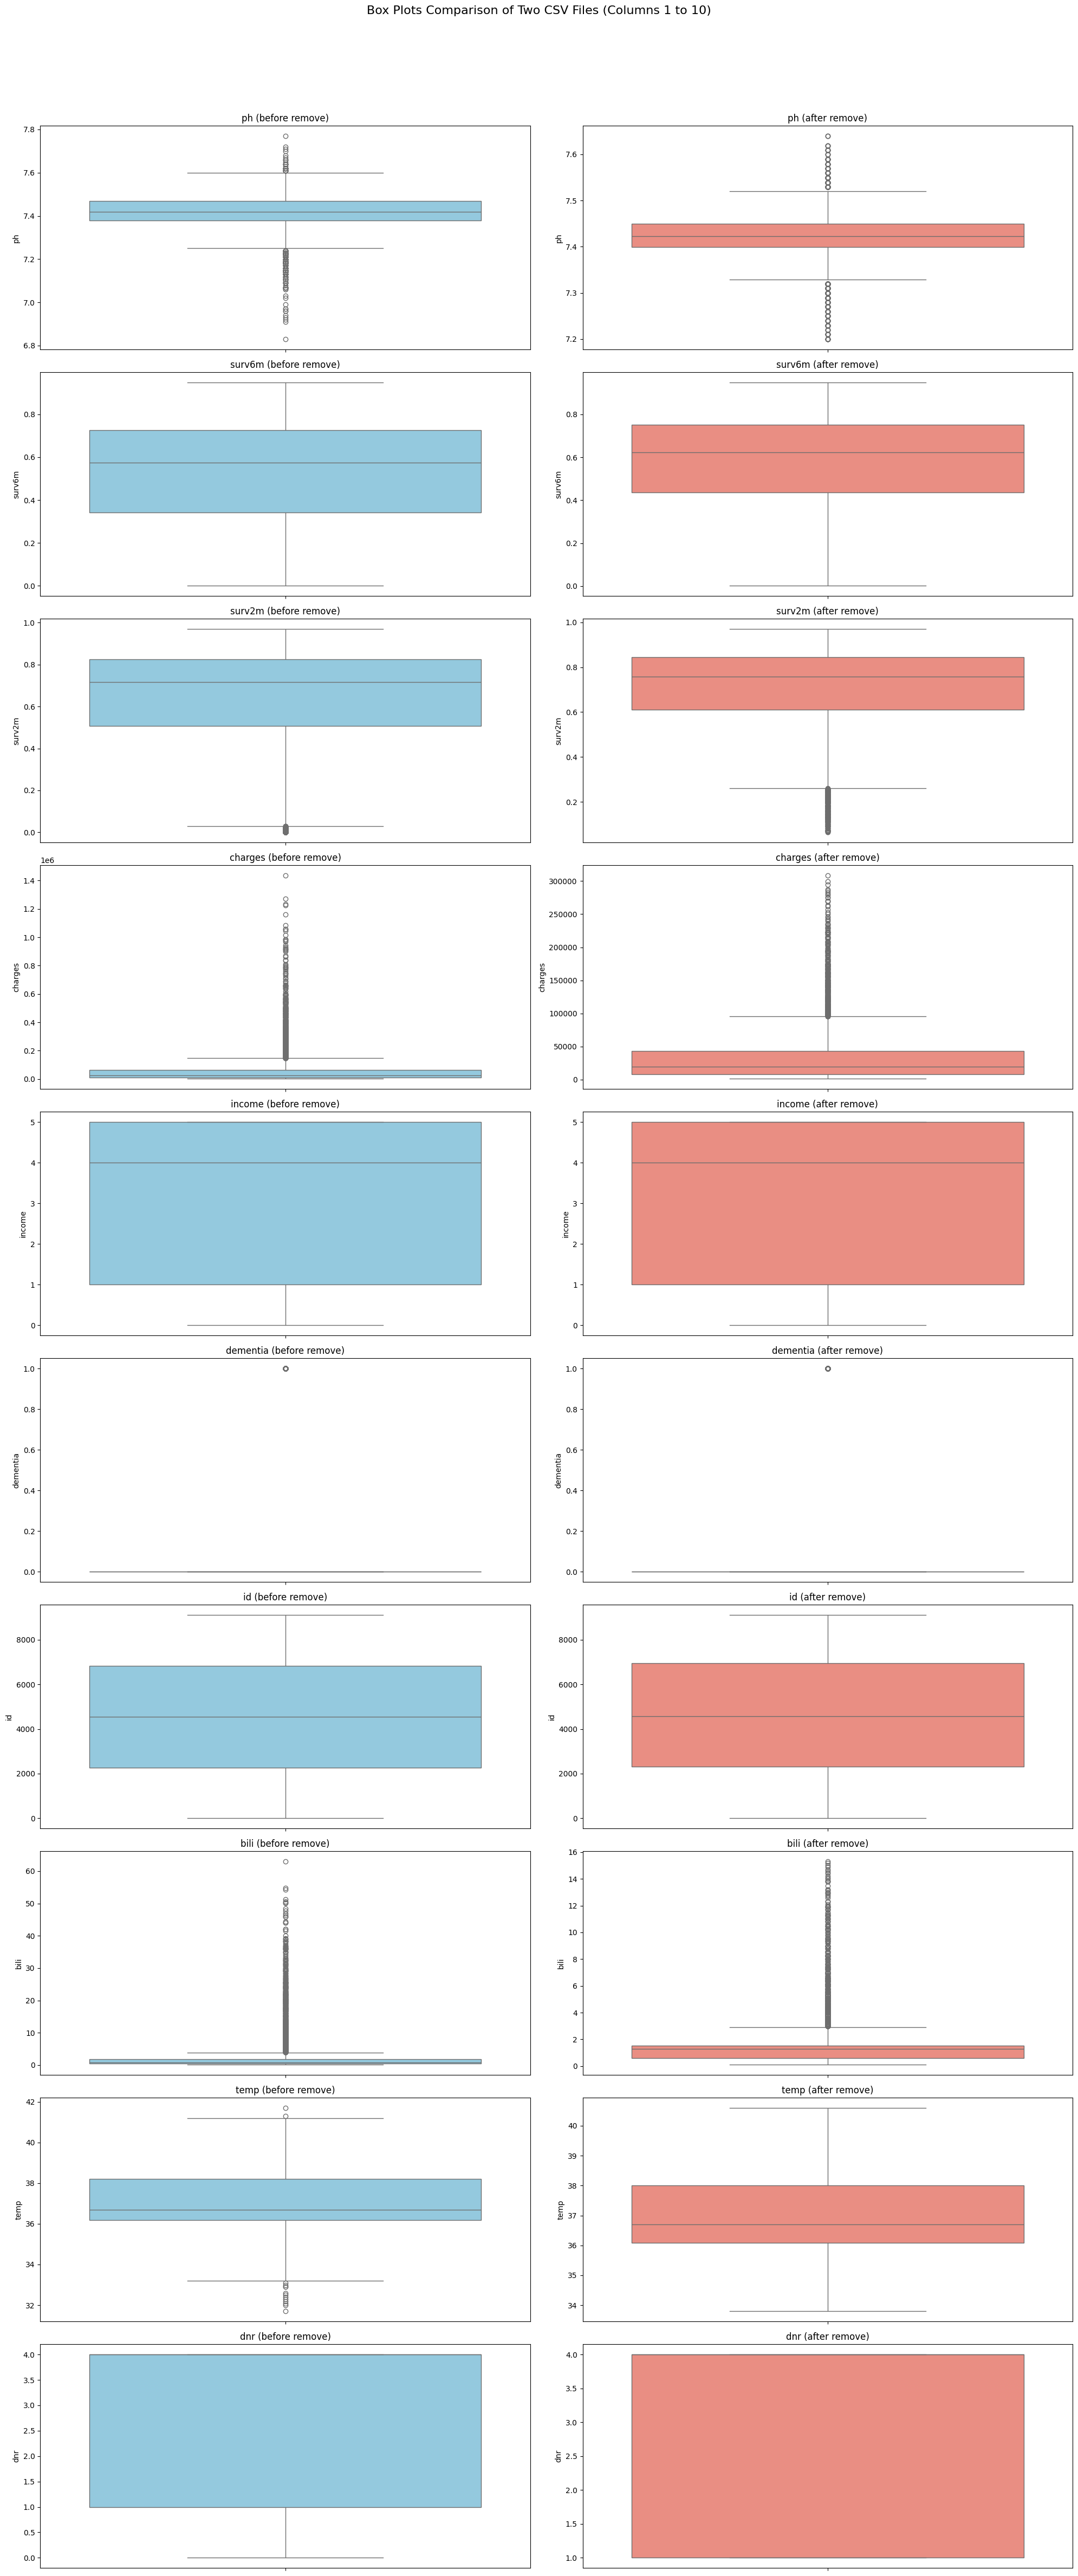

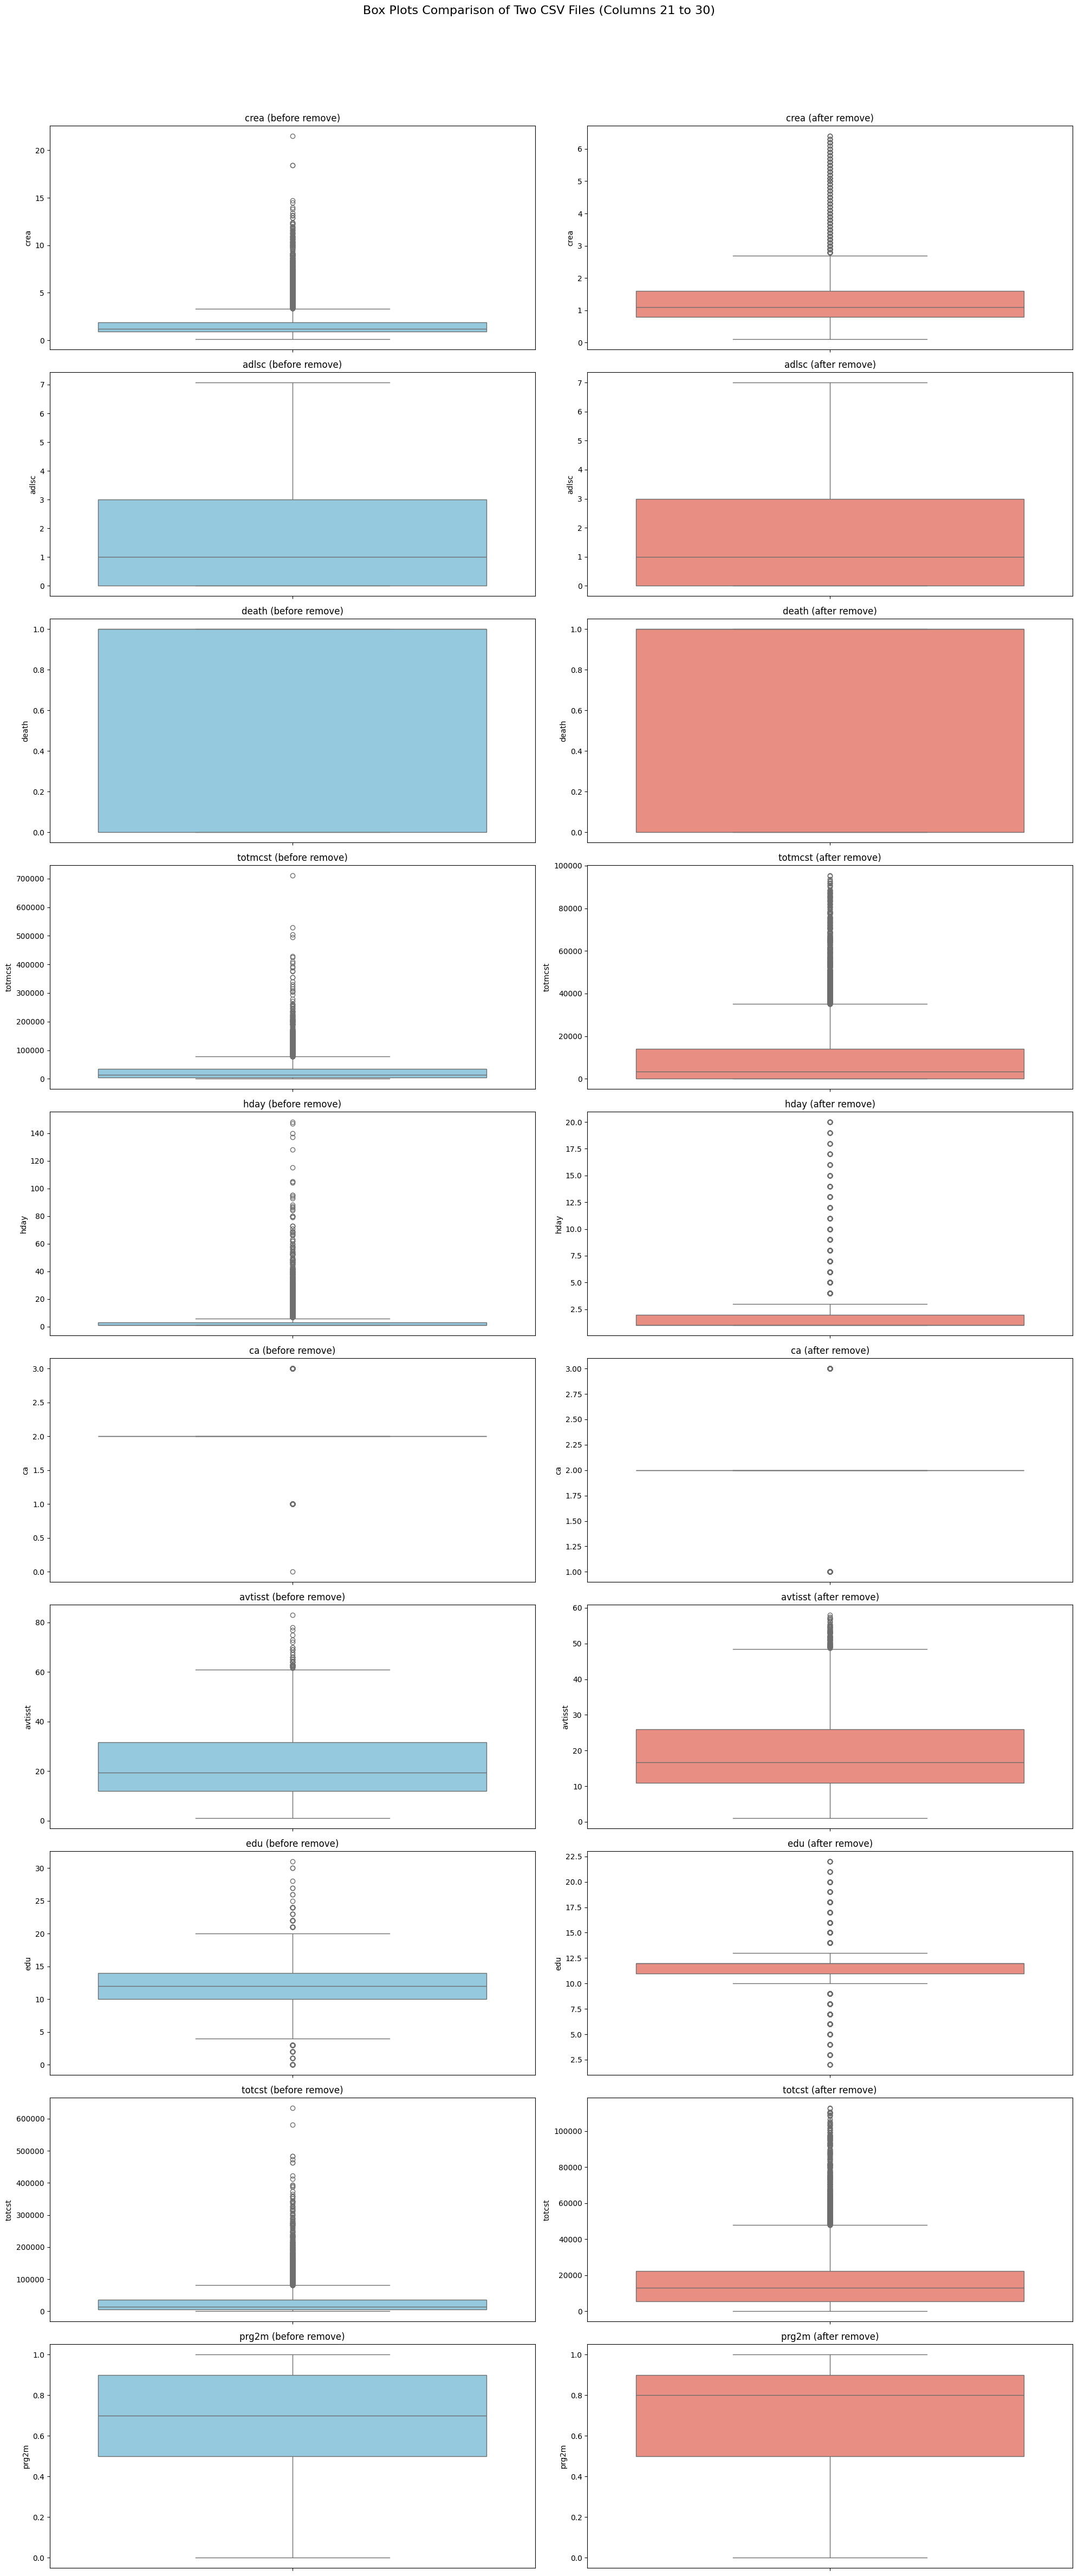

In [ ]:
# Define directory for saving plots
plots_dir = './csv/plots'
# if not os.path.exists(plots_dir):
#     os.makedirs(plots_dir)

# Load the two CSV files into separate DataFrames
file_path1 = './filled_no_outliner.csv'  
file_path2 = './filled_data.csv'  
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

# Function to plot side-by-side box plots for comparison
def plot_boxplots_side_by_side(df1, df2, columns, title, filename_prefix):
    max_subplots = 20  # Strict limit for subplots (10 columns per figure)
    
    # Loop through columns in batches of 10 (20 subplots for side-by-side plots)
    for start in range(0, len(columns), max_subplots // 2):
        # Slice the columns for the current figure
        columns_slice = columns[start:start + max_subplots // 2]
        num_rows = len(columns_slice)  # One row per column
        
        plt.figure(figsize=(20, 5 * num_rows))
        
        for i, column in enumerate(columns_slice):
            # Box plot for the first CSV file
            plt.subplot(num_rows, 2, 2 * i + 1)
            sns.boxplot(y=df1[column], color='skyblue')
            plt.title(f'{column} (before remove)')
            
            # Box plot for the second CSV file
            plt.subplot(num_rows, 2, 2 * i + 2)
            sns.boxplot(y=df2[column], color='salmon')
            plt.title(f'{column} (after remove)')
        
        # Title and layout
        plt.suptitle(f'{title} (Columns {start + 1} to {start + len(columns_slice)})', fontsize=16)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        
        # Save the figure with a unique filename based on the column range
        filename = f"{filename_prefix}_{start + 1}_to_{start + len(columns_slice)}.png"
        plt.savefig(os.path.join(plots_dir, filename))
        plt.show()

# Select common numeric columns in both DataFrames
common_numeric_columns = list(set(df1.select_dtypes(include='number').columns) & set(df2.select_dtypes(include='number').columns))

# Plot side-by-side box plots for comparison
plot_boxplots_side_by_side(df1, df2, common_numeric_columns, "Box Plots Comparison of Two CSV Files", 'boxplots_comparison')

### 8. ทำ Normalization เพื่อทำให้ Feature อยู่ในช่วงเดียวกันทั้งหมด ทำให้ง่ายต่อการทำ Model ขึ้น

จัดการกราฟให้มีการกระจายตัวที่ดีขึ้น ประกอบด้วย 3 วิธี คือ 
1. Log Transformation
- วิธีการ: การใช้ค่า logarithm ของข้อมูล โดยทั่วไปจะใช้ log base 10 หรือ natural log (ln)
- การใช้งาน: เหมาะสำหรับข้อมูลที่มีการกระจายตัวแบบชิดขวา (right-skewed) หรือมีค่ามากที่ส่งผลต่อการกระจาย ตัวอย่างเช่น 
ผลลัพธ์: ช่วยลดความไม่สมมาตรและทำให้การกระจายตัวใกล้เคียงกับ Gaussian distribution มากขึ้น

2. Square Root Transformation
- วิธีการ: ใช้การถอดรากที่สองของค่าข้อมูล
- การใช้งาน: เหมาะสำหรับข้อมูลที่มีการกระจายตัวแบบชิดขวาเช่นเดียวกับ log transformation แต่มีความเหมาะสมกว่าเมื่อค่าที่ต่ำกว่าศูนย์มีน้อยมาก
ผลลัพธ์: ช่วยลด skewness และทำให้การกระจายตัวมีความสมมาตรดีขึ้น

3. Box-Cox Transformation
- วิธีการ: ใช้ฟังก์ชันที่มีพารามิเตอร์ λ (lambda) ที่ปรับเปลี่ยนเพื่อหาค่าที่เหมาะสมที่สุดในการทำให้ข้อมูลมีความสมมาตรที่สุด
- การใช้งาน: สามารถใช้กับข้อมูลเชิงปริมาณและสามารถหาค่าที่เหมาะสมที่สุดสำหรับ λ โดยใช้การเพิ่มความเหมาะสม (maximum likelihood estimation)
ผลลัพธ์: Box-Cox transformation มักจะให้ผลลัพธ์ที่ดีที่สุดในแง่ของการลด skewness

โดยเลือกใช้วิธีที่ได้ค่า skewness ใกล้เคียงกับ 0 มากที่สุด 


--- Column: age ---
Best transformation for age: Box-Cox (Skewness: -0.10)

--- Column: slos ---
Best transformation for slos: Box-Cox (Skewness: 0.02)

--- Column: d.time ---
Best transformation for d.time: Box-Cox (Skewness: -0.16)

--- Column: dzgroup ---
Best transformation for dzgroup: Square Root (Skewness: 0.07)

--- Column: dzclass ---
Best transformation for dzclass: Log (Skewness: 0.07)

--- Column: num.co ---
Best transformation for num.co: Box-Cox (Skewness: 0.04)

--- Column: edu ---
Best transformation for edu: Box-Cox (Skewness: 0.10)

--- Column: income ---
Best transformation for income: Box-Cox (Skewness: -0.63)

--- Column: scoma ---
Best transformation for scoma: Box-Cox (Skewness: -0.11)

--- Column: charges ---
Best transformation for charges: Box-Cox (Skewness: 0.01)

--- Column: totcst ---
Best transformation for totcst: Box-Cox (Skewness: -0.01)

--- Column: totmcst ---
Column 'totmcst' contains negative values. Skipping skewness and transformations.

--- Colu

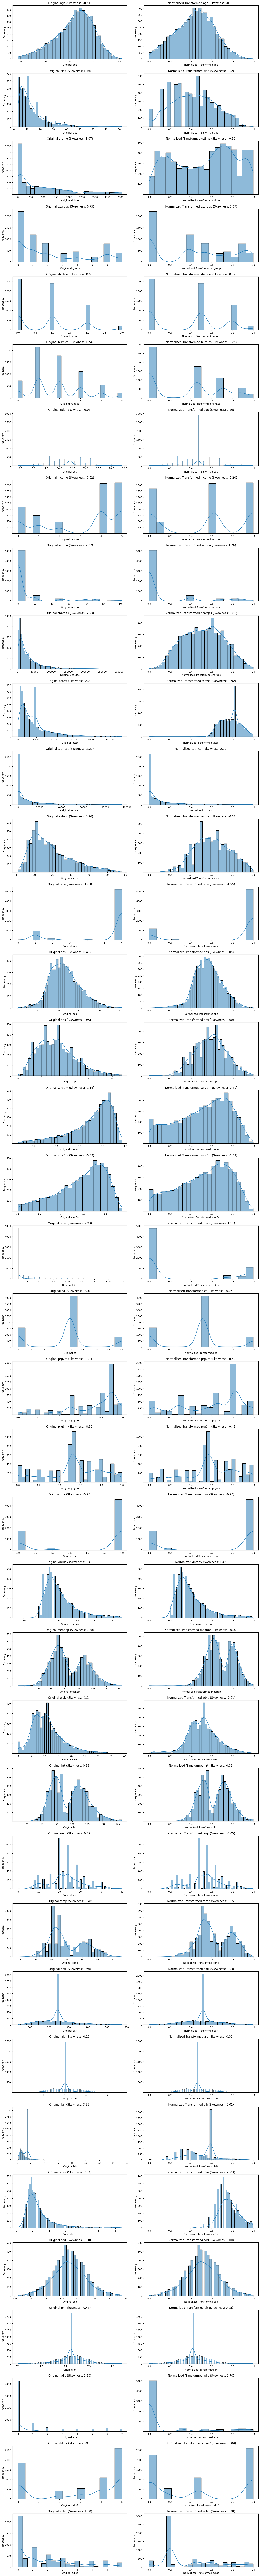

Normalized data saved to ./normalized_data.csv


In [ ]:
# โหลดข้อมูล
file_path = './filled_data.csv'
data = pd.read_csv(file_path)

# คอลัมน์ที่ต้องการ Normalize
columns_to_transform = ['age', 'slos', 'd.time', 'dzgroup', 
                        'dzclass', 'num.co', 'edu', 'income', 'scoma', 'charges', 'totcst',
                        'totmcst', 'avtisst', 'race', 'sps', 'aps', 'surv2m', 'surv6m', 'hday',
                        'ca', 'prg2m', 'prg6m', 'dnr', 'dnrday',
                        'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea',
                        'sod', 'ph', 'adls', 'sfdm2', 'adlsc']

# ฟังก์ชันในการประเมิน skewness และ plot
def plot_and_evaluate(column_data, title, ax):
    skewness = column_data.skew()
    sns.histplot(column_data.dropna(), kde=True, ax=ax)
    ax.set_title(f'{title} (Skewness: {skewness:.2f})')
    ax.set_xlabel(title)
    ax.set_ylabel('Frequency')
    return skewness

# ฟังก์ชันในการ Normalize ข้อมูล (min-max scaling)
def normalize(column_data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    normalized = scaler.fit_transform(column_data.values.reshape(-1, 1))
    return pd.Series(normalized.flatten(), index=column_data.index)

# เตรียม Dictionary เพื่อเก็บข้อมูลที่ Normalize แล้ว
normalized_data_dict = {}

# ตั้งค่า grid ของ subplots
rows = len(columns_to_transform)
fig, axes = plt.subplots(rows, 2, figsize=(16, 4 * rows))
fig.tight_layout(pad=4.0)

# วนลูปผ่านแต่ละคอลัมน์และทำการแปลง
for i, column in enumerate(columns_to_transform):
    if column in data.columns and column != 'id':
        print(f"\n--- Column: {column} ---")
        
        column_data = data[column].copy()
        
        # ตรวจสอบว่ามีค่าติดลบหรือไม่
        if (column_data < 0).any():
            print(f"Column '{column}' contains negative values. Skipping skewness and transformations.")
            
            # เพียง Normalize อย่างเดียว
            normalized_data = normalize(column_data)
            normalized_data_dict[column] = normalized_data
            
            # Plot ข้อมูลต้นฉบับและ Normalize โดยไม่มีการแปลง
            ax_original = axes[i, 0]
            plot_and_evaluate(column_data, f'Original {column}', ax_original)
            
            ax_norm = axes[i, 1]
            plot_and_evaluate(normalized_data, f'Normalized {column}', ax_norm)
        
        else:
            # Plot ข้อมูลต้นฉบับ
            ax_original = axes[i, 0]
            plot_and_evaluate(column_data, f'Original {column}', ax_original)
            
            # ทำการแปลงต่างๆ
            log_transformed_data = pd.Series(np.log1p(column_data), index=column_data.index)
            sqrt_transformed_data = pd.Series(np.sqrt(column_data), index=column_data.index)
            
            # Box-Cox ต้องการค่ามากกว่า 0
            try:
                boxcox_transformed_data, _ = stats.boxcox(column_data[column_data > 0])
                boxcox_transformed_data = pd.Series(boxcox_transformed_data, index=column_data[column_data > 0].index)
                boxcox_skewness = boxcox_transformed_data.skew()
            except ValueError:
                boxcox_transformed_data = pd.Series(np.nan, index=column_data.index)
                boxcox_skewness = np.nan
            
            # คำนวณ skewness ของการแปลงแต่ละแบบ
            skew_log = log_transformed_data.skew() if not log_transformed_data.empty else np.nan
            skew_sqrt = sqrt_transformed_data.skew() if not sqrt_transformed_data.empty else np.nan
            skew_boxcox = boxcox_skewness
            
            skewness_values = {
                'Log': skew_log,
                'Square Root': skew_sqrt,
                'Box-Cox': skew_boxcox
            }
            
            # เลือกการแปลงที่ skewness ใกล้เคียงกับ 0 มากที่สุด
            best_transformation = min(
                [k for k in skewness_values if not np.isnan(skewness_values[k])],
                key=lambda k: abs(skewness_values[k])
            )
            
            print(f"Best transformation for {column}: {best_transformation} (Skewness: {skewness_values[best_transformation]:.2f})")
            
            # เลือกข้อมูลที่ถูกแปลงดีที่สุด
            if best_transformation == 'Log':
                best_transformed_data = log_transformed_data
            elif best_transformation == 'Square Root':
                best_transformed_data = sqrt_transformed_data
            elif best_transformation == 'Box-Cox':
                best_transformed_data = boxcox_transformed_data
            
            # สร้าง Series สำหรับการแปลงทั้งหมด โดยแทนที่เฉพาะค่าที่มากกว่า 0
            transformed_full = pd.Series(np.nan, index=column_data.index)
            transformed_full.loc[column_data >= 0] = best_transformed_data
            
            # นำข้อมูลที่ถูกแปลงดีที่สุดแล้วมา normalize ให้อยู่ในช่วง 0-1
            normalized_data = normalize(transformed_full.fillna(0))
            normalized_data_dict[column] = normalized_data
            
            # Plot ข้อมูลที่ Normalize แล้ว
            ax_norm = axes[i, 1]
            plot_and_evaluate(normalized_data, f'Normalized Transformed {column}', ax_norm)

plt.show()

# สร้าง DataFrame จาก normalized_data_dict
normalized_df = pd.DataFrame(normalized_data_dict)

final_data = data.copy()
for column in normalized_data_dict:
    final_data[column] = normalized_df[column]

# บันทึกข้อมูลลงในไฟล์ CSV
output_file_path = './normalized_data.csv'
final_data.to_csv(output_file_path, index=False)

print(f"Normalized data saved to {output_file_path}")

# 9.Data Analysis (การวิเคราะห์ข้อมูล)
**การสำรวจความสัมพันธ์:** วิเคราะห์ความสัมพันธ์ระหว่างตัวแปร เช่น correlation matrix

**การวิเคราะห์ข้อมูลเชิงลึก:** ศึกษา pattern หรือ insight ที่ซ่อนอยู่ในข้อมูล


         id    age  death    sex  hospdead   slos  d.time  dzgroup  dzclass  \
0     False  False  False  False     False  False   False    False    False   
1     False  False  False  False     False  False   False    False    False   
2     False  False  False  False     False  False   False    False    False   
3     False  False  False  False     False  False   False    False    False   
4     False  False  False  False     False  False   False    False    False   
...     ...    ...    ...    ...       ...    ...     ...      ...      ...   
6501  False  False  False  False     False  False   False    False    False   
6502  False  False  False  False     False  False   False    False    False   
6503  False  False  False  False     False  False   False    False    False   
6504  False  False  False  False     False  False   False    False    False   
6505  False  False  False  False     False  False   False    False    False   

      num.co  ...   temp   pafi    alb   bili   cre

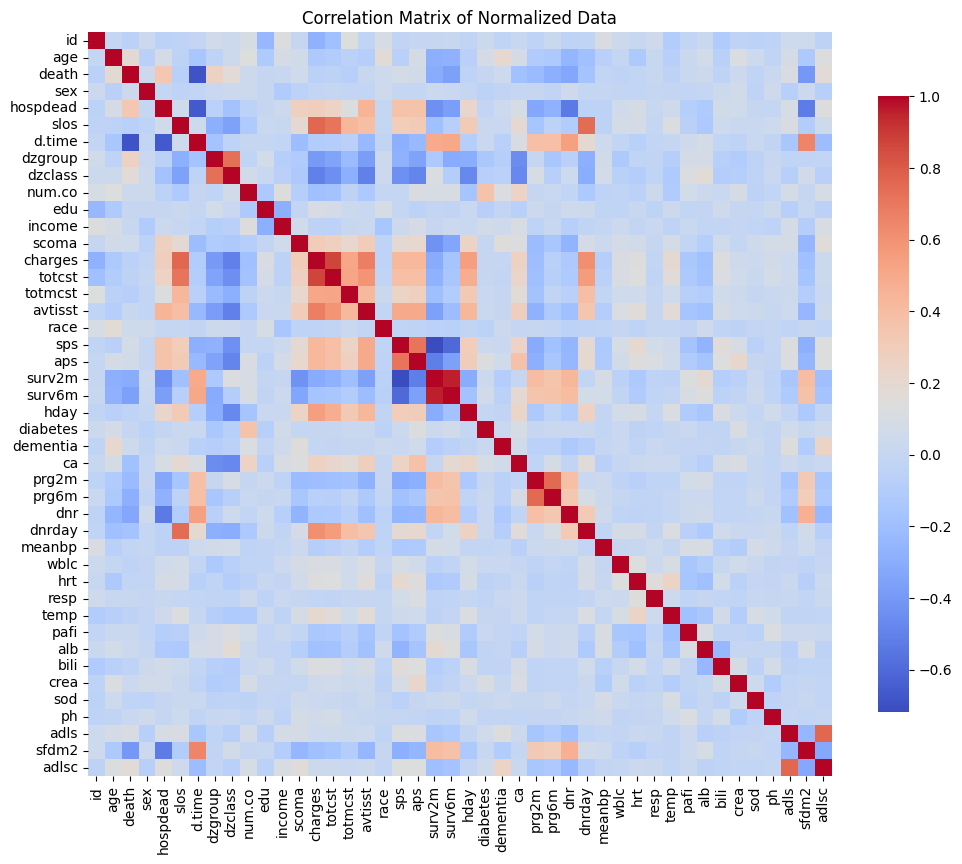

In [50]:
file_path = './normalized_data.csv'
# file_path = 'filled_data.csv'
data = pd.read_csv(file_path)

# Detect NaN values
nan_values = data.isna()  # or df.isnull()

# Show NaN locations
print(nan_values)

# Alternatively, count NaNs in each column
nan_count = df.isna().sum()
print("\nNaN count per column:\n", nan_count)

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Normalized Data')
plt.show()

### สรุป correlation matrix
- ความสัมพันธ์โดยตรงระหว่าง death กับตัวแปรอื่นๆ:
    
    - **ตัวแปรที่มีความสัมพันธ์เชิงบวกกับ death: age , hospdead ,dzgroup ,dzclass, adlsc**
    
        สีแดงอ่อนถึงเข้ม ซึ่งหมายถึงโอกาสที่การเพิ่มขึ้นของค่าตัวแปรนั้นจะเพิ่มโอกาสของ death
        ตัวแปรที่มีความสัมพันธ์เชิงบวกมากๆ อาจเป็นตัวบ่งบอกว่าเป็นปัจจัยเสี่ยงต่อการเสียชีวิต
    
    - **ตัวแปรที่มีความสัมพันธ์เชิงลบกับ death: d.time, surv2m, surv6m ,ca, prg2m ,prg6m,dnr, dnrday, sfdm2**
    
        มีสีใกล้เคียงกับน้ำเงิน ตัวแปรเหล่านี้แสดงถึงการมีความสัมพันธ์ในทิศทางตรงกันข้าม กล่าวคือ เมื่อค่าของตัวแปรนั้นสูงขึ้น โอกาสของ death อาจลดลง ตัวแปรที่มีความสัมพันธ์เชิงลบสูง (เช่น สีฟ้าเข้ม) อาจเป็นตัวบ่งชี้ที่ดีสำหรับปัจจัยที่ช่วยลดโอกาสของการเสียชีวิต
    
    - **ตัวแปรที่ไม่มีความสัมพันธ์ชัดเจนกับ death: ที่เหลือ**
        
        ตัวแปรที่มีสีขาวหรือสีอ่อนแสดงถึงความสัมพันธ์ที่น้อยหรือไม่มีนัยสำคัญกับ death ตัวแปรเหล่านี้อาจไม่สำคัญต่อตัวแปรเป้าหมายมากนักในเชิงการวิเคราะห์

##### Define Target data

In [51]:
file_path = './normalized_data.csv'
df = pd.read_csv(file_path)

X = df.drop(['death'], axis=1)  # Features
y = df['death']               # Target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 10.Model Training

ทำการ train model ด้วย 6 โมเดล ดังต่อไปนี้ 

1. Random Forest

2. SVM (Support Vector Machine)

3. Neural Network

4. Logistic Regression

5. Decision Tree

6. K-Nearest Neighbors (K-NN)

In [63]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# SVM
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# Neural Network
nn = MLPClassifier(random_state=42, max_iter=1000, learning_rate_init=0.001)
nn.fit(X_train, y_train)
nn_pred = nn.predict(X_test)

# Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# K-Nearest Neighbors (K-NN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Evaluate models
models = {
    "Random Forest": rf_pred,
    "SVM": svm_pred,
    "Neural Network": nn_pred,
    "Logistic Regression": lr_pred,
    "Decision Tree": dt_pred,
    "K-Nearest Neighbors (K-NN)": knn_pred
}

from sklearn.metrics import accuracy_score, recall_score, precision_score

# Evaluate models and print results
print("{:<30} {:<10} {:<10} {:<10}".format("Model", "Accuracy", "Recall", "Precision"))
print("="*70)

for model_name, predictions in models.items():
    accuracy = accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions, average='weighted')
    precision = precision_score(y_test, predictions, average='weighted')
    print("{:<30} {:<10.2f} {:<10.2f} {:<10.2f}".format(model_name, accuracy, recall, precision))



Model                          Accuracy   Recall     Precision 
Random Forest                  0.90       0.90       0.90      
SVM                            0.89       0.89       0.89      
Neural Network                 0.88       0.88       0.88      
Logistic Regression            0.87       0.87       0.87      
Decision Tree                  0.88       0.88       0.88      
K-Nearest Neighbors (K-NN)     0.81       0.81       0.81      


# 11.Hyperparameter Tuning Methods 

เลือกใช้วิธีการจูนพารามิเตอร์ด้วย 3 วิธีดังนี้ เนื่องจาก

1. Grid Search
- คำอธิบาย: วิธีการที่พิจารณาค่าของ hyperparameters ในรูปแบบตาราง (grid) โดยกำหนดช่วงค่าที่ต้องการและสำรวจค่าทุกค่าผ่าน
  
  การทดลองแบบ exhaustive จะสร้างการรวมกันของค่าทั้งหมดที่กำหนดสำหรับแต่ละ hyperparameter
  
- ข้อดี:ให้การค้นหาค่าที่ดีที่สุดในพื้นที่ hyperparameter อย่างครอบคลุม ง่ายต่อการเข้าใจและใช้งาน
- ข้อเสีย:ต้องใช้เวลาและทรัพยากรมาก โดยเฉพาะถ้ามีจำนวน hyperparameters และค่าที่ต้องทดลองมาก อาจไม่เหมาะสมสำหรับโมเดลที่ใช้เวลาฝึกฝนนาน

2. Random Search
- คำอธิบาย: การสุ่มเลือกชุดค่าของ hyperparameters จากช่วงค่าที่กำหนดแทนการค้นหาทุกค่าที่เป็นไปได้
- การทำงาน: ในแต่ละรอบ จะสุ่มเลือกค่าที่กำหนดและฝึกโมเดล เพื่อตรวจสอบประสิทธิภาพ จนกว่าจะถึงจำนวนรอบที่กำหนด
- ข้อดี:มักใช้เวลาน้อยกว่าการทำ Grid Search เนื่องจากไม่ต้องตรวจสอบค่าทุกค่าทั่วทั้งพื้นที่อาจค้นพบค่าที่ดีได้รวดเร็วกว่าการสำรวจทั้งหมด
- ข้อเสีย:อาจไม่รับประกันว่าจะพบค่าที่ดีที่สุด อาจจำเป็นต้องกำหนดจำนวนรอบที่สุ่มเลือก ซึ่งอาจทำให้ผลลัพธ์มีความไม่แน่นอน

3. Bayesian Optimization
- คำอธิบาย: เทคนิคทางสถิติเพื่อสร้างโมเดลที่คาดการณ์ค่าประสิทธิภาพของโมเดลตามค่าของ hyperparameters ที่ได้รับการทดลองแล้ว
- การทำงาน: จะใช้ข้อมูลจากการทดลองก่อนหน้าเพื่อเลือกค่าถัดไปที่จะทดลอง โดยมีวัตถุประสงค์ในการเพิ่มประสิทธิภาพอย่างมีประสิทธิผล
- ข้อดี:สามารถค้นหาค่าที่ดีที่สุดได้อย่างมีประสิทธิภาพ โดยลดจำนวนการทดลองที่ต้องทำ 

  เหมาะสำหรับการค้นหาค่าที่มีความซับซ้อนหรือการใช้งานในสถานการณ์ที่ค่าของ hyperparameters มีจำนวนมาก
- ข้อเสีย:การตั้งค่าขั้นตอนการทำงานอาจจะซับซ้อนกว่า ต้องการการคำนวณที่ซับซ้อนในการประเมินค่าเชิงปริมาณ (quantitative assessment)



## 1.Grid Search
### Random Forest (Grid Search)
1. `n_estimators`: Number of trees in the forest.
2. `max_depth`: Maximum depth of each tree. Deeper trees can model more complex relationships but may overfit.
3. `min_samples_split`: Minimum number of samples required to split a node.

In [28]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'precision': 'precision'
}

# Define the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Define the grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize Grid Search with multiple scoring metrics
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, verbose=2, scoring=scoring, refit='accuracy')
grid_search_rf.fit(X_train, y_train)

# Best hyperparameters based on accuracy (default refit metric)
print("Best Hyperparameters for Random Forest:", grid_search_rf.best_params_)
print("Best Accuracy Score:", grid_search_rf.best_score_)

# Retrieve and display the best recall and precision scores
best_index = grid_search_rf.best_index_
best_recall = grid_search_rf.cv_results_['mean_test_recall'][best_index]
best_precision = grid_search_rf.cv_results_['mean_test_precision'][best_index]

print("Best Recall Score:", best_recall)
print("Best Precision Score:", best_precision)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   2.2s
[CV] END max_depth=None, 

##### Scoring of Recall and Precision of each parameters in tuning

In [29]:
# Convert cv_results_ to a DataFrame for easier viewing
results_df = pd.DataFrame(grid_search_rf.cv_results_)

# Select relevant columns for viewing
results_df = results_df[['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 
                         'mean_test_accuracy', 'mean_test_recall', 'mean_test_precision']]

# Sort by accuracy for convenience
results_df = results_df.sort_values(by='mean_test_accuracy', ascending=False)

# Display the DataFrame
print(results_df)

    param_n_estimators param_max_depth  param_min_samples_split  \
6                  100            None                       10   
8                  300            None                       10   
7                  200            None                       10   
25                 200              20                       10   
19                 200              20                        2   
1                  200            None                        2   
26                 300              20                       10   
2                  300            None                        2   
24                 100              20                       10   
23                 300              20                        5   
20                 300              20                        2   
22                 200              20                        5   
4                  200            None                        5   
0                  100            None                        

### SVM (Grid Search)
We'll tune the following hyperparameters:
1. `C`: Regularization parameter.
2. `kernel`: Type of kernel (linear, polynomial, RBF).
3. `gamma`: Kernel coefficient for RBF and polynomial kernels.

In [31]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'precision': 'precision'
}

# Define the grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize Grid Search for SVM
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, verbose=2, scoring=scoring, refit='accuracy')
grid_search_svm.fit(X_train, y_train)

# Best hyperparameters for SVM
print("Best Hyperparameters for SVM:", grid_search_svm.best_params_)
print("Best Accuracy Score:", grid_search_svm.best_score_)

# Retrieve and display the best recall and precision scores
best_index = grid_search_svm.best_index_
best_recall = grid_search_svm.cv_results_['mean_test_recall'][best_index]
best_precision = grid_search_svm.cv_results_['mean_test_precision'][best_index]

print("Best Recall Score:", best_recall)
print("Best Precision Score:", best_precision)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.2s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.2s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.5s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.5s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.5s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.5s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.5s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.2s
[CV] END ...................C=0.1, gamma=auto, k

##### Scoring of Recall and Precision of each parameters in tuning

In [33]:
# Convert cv_results_ to a DataFrame for easier viewing
results_df = pd.DataFrame(grid_search_svm.cv_results_)

# Select relevant columns for viewing
results_df = results_df[['param_C', 'param_kernel', 'param_gamma', 
                         'mean_test_accuracy', 'mean_test_recall', 'mean_test_precision']]

# Sort by accuracy for convenience
results_df = results_df.sort_values(by='mean_test_accuracy', ascending=False)

# Display the DataFrame
print(results_df)

    param_C param_kernel param_gamma  mean_test_accuracy  mean_test_recall  \
5       1.0          rbf       scale            0.882974          0.889666   
7       1.0          rbf        auto            0.882590          0.889081   
8      10.0       linear       scale            0.878556          0.887033   
10     10.0       linear        auto            0.878556          0.887033   
6       1.0       linear        auto            0.878172          0.885570   
4       1.0       linear       scale            0.878172          0.885570   
2       0.1       linear        auto            0.878172          0.884983   
0       0.1       linear       scale            0.878172          0.884983   
9      10.0          rbf       scale            0.867218          0.892595   
11     10.0          rbf        auto            0.867026          0.892595   
3       0.1          rbf        auto            0.849347          0.893767   
1       0.1          rbf       scale            0.848579        

### Neural Network (Grid Search)

For the **Neural Network**, we'll tune:
1. `hidden_layer_sizes`: The number of neurons in the hidden layers.
2. `activation`: Activation function for neurons.
3. `learning_rate_init`: Initial learning rate.


In [34]:
scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'precision': 'precision'
}

# Define the hyperparameter space for Neural Network
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

grid_search_nn = GridSearchCV(estimator=nn,  param_grid=param_grid_nn, cv=5, verbose=2, scoring=scoring, refit='accuracy')
grid_search_nn.fit(X_train, y_train)

# Best hyperparameters for Neural Network
print("Best Hyperparameters for Neural Network:", grid_search_nn.best_params_)
print("Best Score:",grid_search_nn.best_score_)

best_index = grid_search_nn.best_index_
best_recall = grid_search_nn.cv_results_['mean_test_recall'][best_index]
best_precision = grid_search_nn.cv_results_['mean_test_precision'][best_index]

print("Best Recall Score:", best_recall)
print("Best Precision Score:", best_precision)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001; total time=   4.3s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001; total time=   4.5s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001; total time=   4.7s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001; total time=   4.2s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001; total time=   4.2s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.01; total time=   0.9s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.01; total time=   0.6s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.01; total time=   0.9s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.01; total time=   0.9s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init

##### Scoring of Recall and Precision of each parameters in tuning

In [36]:
# Convert cv_results_ to a DataFrame for easier viewing
results_df = pd.DataFrame(grid_search_nn.cv_results_)

# Select relevant columns for viewing
results_df = results_df[['param_hidden_layer_sizes', 'param_activation', 'param_learning_rate_init', 
                         'mean_test_accuracy', 'mean_test_recall', 'mean_test_precision']]

# Sort by accuracy for convenience
results_df = results_df.sort_values(by='mean_test_accuracy', ascending=False)

# Display the DataFrame
print(results_df)

   param_hidden_layer_sizes param_activation  param_learning_rate_init  \
3                    (100,)             relu                     0.001   
15                   (150,)             tanh                     0.001   
12                   (100,)             tanh                     0.001   
4                    (100,)             relu                     0.010   
13                   (100,)             tanh                     0.010   
16                   (150,)             tanh                     0.010   
7                    (150,)             relu                     0.010   
9                     (50,)             tanh                     0.001   
6                    (150,)             relu                     0.001   
2                     (50,)             relu                     0.100   
5                    (100,)             relu                     0.100   
0                     (50,)             relu                     0.001   
10                    (50,)           

### Logistic Regression (Grid Search)

For the **Logistic Regression**:
1. `C`: Constant for reducing overfitting.
2. `solver`: Choice of optimization method to use.
3. `penalty`: Value of regularization.


In [37]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'precision': 'precision'
}

# Define the grid for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10, 100],  
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  
    'penalty': ['l2'],  
}

# Initialize Grid Search
lr = LogisticRegression(random_state=42, max_iter=1000)
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, verbose=2, scoring=scoring, refit='accuracy')
grid_search_lr.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best Score:", grid_search_lr.best_score_)

# Retrieve and display the best recall and precision scores
best_index = grid_search_lr.best_index_
best_recall = grid_search_lr.cv_results_['mean_test_recall'][best_index]
best_precision = grid_search_lr.cv_results_['mean_test_precision'][best_index]

print("Best Recall Score:", best_recall)
print("Best Precision Score:", best_precision)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, sol

##### Scoring of Recall and Precision of each parameters in tuning

In [ ]:
# Convert cv_results_ to a DataFrame for easier viewing
results_df = pd.DataFrame(grid_search_lr.cv_results_)

# Select relevant columns for viewing
results_df = results_df[['param_C', 'param_solver', 'param_penalty', 
                         'mean_test_accuracy', 'mean_test_recall', 'mean_test_precision']]

# Sort by accuracy for convenience
results_df = results_df.sort_values(by='mean_test_accuracy', ascending=False)

# Display the DataFrame
print(results_df)

    param_C param_solver param_penalty  mean_test_accuracy  mean_test_recall  \
2       0.1    liblinear            l2            0.879325          0.893179   
6       1.0        lbfgs            l2            0.878941          0.896984   
5       1.0    newton-cg            l2            0.878749          0.897277   
7       1.0    liblinear            l2            0.878749          0.896399   
9       1.0         saga            l2            0.878749          0.897277   
8       1.0          sag            l2            0.878749          0.897277   
19    100.0         saga            l2            0.878748          0.896692   
18    100.0          sag            l2            0.878748          0.896692   
17    100.0    liblinear            l2            0.878748          0.896692   
15    100.0    newton-cg            l2            0.878748          0.896692   
10     10.0    newton-cg            l2            0.878556          0.896692   
14     10.0         saga            l2  

### Decision Tree (Grid Search)

For the **Decision Tree**:
1. `max_depth`: Limits the depth of the tree to prevent overfitting.
2. `min_samples_split`: Controls the minimum number of samples needed before a node can be split.
3. `min_samples_leaf`: The minimum number of samples required to be at a leaf node.

In [39]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'precision': 'precision'
}

# Define the grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],  # None allows the tree to expand until all leaves are pure
    'min_samples_split': [2, 5, 10],  # Minimum samples needed to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum samples required at each leaf node
}

# Initialize Grid Search
dt = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, verbose=2, scoring=scoring, refit='accuracy')
grid_search_dt.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters for Decision Tree:", grid_search_dt.best_params_)
print("Best Score:", grid_search_dt.best_score_)

# Retrieve and display the best recall and precision scores
best_index = grid_search_dt.best_index_
best_recall = grid_search_dt.cv_results_['mean_test_recall'][best_index]
best_precision = grid_search_dt.cv_results_['mean_test_precision'][best_index]

print("Best Recall Score:", best_recall)
print("Best Precision Score:", best_precision)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[C

##### Scoring of Recall and Precision of each parameters in tuning

In [41]:
# Convert cv_results_ to a DataFrame for easier viewing
results_df = pd.DataFrame(grid_search_dt.cv_results_)

# Select relevant columns for viewing
results_df = results_df[['param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 
                         'mean_test_accuracy', 'mean_test_recall', 'mean_test_precision']]

# Sort by accuracy for convenience
results_df = results_df.sort_values(by='mean_test_accuracy', ascending=False)

# Display the DataFrame
print(results_df)

   param_max_depth  param_min_samples_split  param_min_samples_leaf  \
15              10                        2                       4   
16              10                        5                       4   
12              10                        2                       2   
14              10                       10                       2   
11              10                       10                       1   
17              10                       10                       4   
13              10                        5                       2   
10              10                        5                       1   
6             None                        2                       4   
7             None                        5                       4   
24              20                        2                       4   
25              20                        5                       4   
34              30                        5                       4   
33    

### K-Nearest Neighbors (Grid Search) 

For the **K-Nearest Neighbors**:
1. `n_neighbors`: The number of nearest neighbors to use for classification.
2. `weights`: Determines if all points in each neighborhood are weighted equally or by distance.
3. `p`: Defines the distance metric.

In [43]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'precision': 'precision'
}

# Define the grid for KNN
param_grid_knn = {
    'n_neighbors': [11, 13, 15, 17],    
    'weights': ['uniform', 'distance'],  
    'p': [1, 2]  
}

# Initialize Grid Search
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, verbose=2, scoring=scoring, refit='accuracy')
grid_search_knn.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters for KNN:", grid_search_knn.best_params_)
print("Best Score:", grid_search_knn.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ...............n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END ..............n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=11, p=2, wei

##### Scoring of Recall and Precision of each parameters in tuning

In [44]:
# Convert cv_results_ to a DataFrame for easier viewing
results_df = pd.DataFrame(grid_search_knn.cv_results_)

# Select relevant columns for viewing
results_df = results_df[['param_n_neighbors', 'param_weights', 'param_p', 
                         'mean_test_accuracy', 'mean_test_recall', 'mean_test_precision']]

# Sort by accuracy for convenience
results_df = results_df.sort_values(by='mean_test_accuracy', ascending=False)

# Display the DataFrame
print(results_df)

    param_n_neighbors param_weights  param_p  mean_test_accuracy  \
12                 17       uniform        1            0.807071   
13                 17      distance        1            0.806879   
4                  13       uniform        1            0.805726   
5                  13      distance        1            0.805342   
9                  15      distance        1            0.804574   
8                  15       uniform        1            0.804574   
1                  11      distance        1            0.799578   
0                  11       uniform        1            0.799385   
6                  13       uniform        2            0.798617   
7                  13      distance        2            0.798424   
2                  11       uniform        2            0.794582   
3                  11      distance        2            0.794582   
15                 17      distance        2            0.793235   
14                 17       uniform        2    

## 2.Randomized Search
### Random Forest (Randomized Search)
1. `n_estimators`: Number of trees in the forest.
2. `max_depth`: Maximum depth of each tree. Deeper trees can model more complex relationships but may overfit.
3. `min_samples_split`: Minimum number of samples required to split a node.

In [52]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'precision': 'precision'
}

# Define the hyperparameter space for Random Forest
param_dist_rf = {
    'n_estimators': [int(x) for x in np.linspace(100, 500, 10)],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize Randomized Search
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist_rf, n_iter=10, cv=5, verbose=2,scoring=scoring, refit='accuracy')
random_search_rf.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters for Random Forest (Randomized Search):", random_search_rf.best_params_)
print("Best Score:",random_search_rf.best_score_)

# Retrieve and display the best recall and precision scores
best_index = random_search_rf.best_index_
best_recall = random_search_rf.cv_results_['mean_test_recall'][best_index]
best_precision = random_search_rf.cv_results_['mean_test_precision'][best_index]

print("Best Recall Score:", best_recall)
print("Best Precision Score:", best_precision)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, min_samples_split=10, n_estimators=455; total time=   3.6s
[CV] END max_depth=30, min_samples_split=10, n_estimators=455; total time=   3.3s
[CV] END max_depth=30, min_samples_split=10, n_estimators=455; total time=   3.5s
[CV] END max_depth=30, min_samples_split=10, n_estimators=455; total time=   3.5s
[CV] END max_depth=30, min_samples_split=10, n_estimators=455; total time=   3.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=366; total time=   2.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=366; total time=   2.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=366; total time=   2.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=366; total time=   2.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=366; total time=   2.7s
[CV] END max_depth=None, min_samples_split=10, n_estimators=411; total time=   2.9s
[CV] END max_depth=None, min_s

##### Scoring of Recall and Precision of each parameters in tuning

In [53]:
# Convert cv_results_ to a DataFrame for easier viewing
results_df = pd.DataFrame(random_search_rf.cv_results_)

# Select relevant columns for viewing
results_df = results_df[['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 
                         'mean_test_accuracy', 'mean_test_recall', 'mean_test_precision']]

# Sort by accuracy for convenience
results_df = results_df.sort_values(by='mean_test_accuracy', ascending=False)

# Display the DataFrame
print(results_df)

   param_n_estimators param_max_depth  param_min_samples_split  \
7                 500            None                        2   
0                 455              30                       10   
3                 144            None                       10   
2                 411            None                       10   
6                 455            None                        2   
1                 366            None                        2   
9                 366              20                        5   
5                 411              10                       10   
4                 366              10                        5   
8                 366              10                        2   

   mean_test_accuracy  mean_test_recall  mean_test_precision  
7            0.902189          0.890255             0.957938  
0            0.901804          0.890547             0.956961  
3            0.901613          0.891426             0.955874  
2            0.901612

### SVM (Randomized Search)
We'll tune the following hyperparameters:
1. `C`: Regularization parameter.
2. `kernel`: Type of kernel (linear, polynomial, RBF).
3. `gamma`: Kernel coefficient for RBF and polynomial kernels.

In [54]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'precision': 'precision'
}

# Define the grid for SVM
param_dist_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize Grid Search for SVM
random_search_svm = RandomizedSearchCV(estimator=svm, param_distributions=param_dist_svm, n_iter=10, cv=5, verbose=2,scoring=scoring, refit='accuracy')
random_search_svm.fit(X_train, y_train)

# Best hyperparameters for SVM
print("Best Hyperparameters for SVM:", random_search_svm.best_params_)
print("Best Score:", random_search_svm.best_score_)

# Retrieve and display the best recall and precision scores
best_index = random_search_svm.best_index_
best_recall = random_search_svm.cv_results_['mean_test_recall'][best_index]
best_precision = random_search_svm.cv_results_['mean_test_precision'][best_index]

print("Best Recall Score:", best_recall)
print("Best Precision Score:", best_precision)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ....................C=10, gamma=auto, kernel=linear; total time=   2.5s
[CV] END ....................C=10, gamma=auto, kernel=linear; total time=   2.6s
[CV] END ....................C=10, gamma=auto, kernel=linear; total time=   2.5s
[CV] END ....................C=10, gamma=auto, kernel=linear; total time=   2.6s
[CV] END ....................C=10, gamma=auto, kernel=linear; total time=   2.5s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   2.4s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   2.4s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   2.2s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   2.5s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   2.6s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.1s
[CV] END ...................C=0.1, gamma=auto, k

##### Scoring of Recall and Precision of each parameters in tuning

In [55]:
# Convert cv_results_ to a DataFrame for easier viewing
results_df = pd.DataFrame(random_search_svm.cv_results_)

# Select relevant columns for viewing
results_df = results_df[['param_C', 'param_kernel', 'param_gamma', 
                         'mean_test_accuracy', 'mean_test_recall', 'mean_test_precision']]

# Sort by accuracy for convenience
results_df = results_df.sort_values(by='mean_test_accuracy', ascending=False)

# Display the DataFrame
print(results_df)

   param_C param_kernel param_gamma  mean_test_accuracy  mean_test_recall  \
9      1.0          rbf       scale            0.882974          0.889666   
3      1.0          rbf        auto            0.882590          0.889081   
1     10.0       linear       scale            0.878556          0.887033   
0     10.0       linear        auto            0.878556          0.887033   
6      0.1       linear       scale            0.878172          0.884983   
2      0.1       linear        auto            0.878172          0.884983   
4     10.0          rbf       scale            0.867218          0.892595   
8     10.0          rbf        auto            0.867026          0.892595   
7      0.1          rbf        auto            0.849347          0.893767   
5      0.1          rbf       scale            0.848579          0.893767   

   mean_test_precision  
9             0.929255  
3             0.929210  
1             0.925202  
0             0.925202  
6             0.926436  
2 

### Neural Network (Randomized Search)

For the **Neural Network**, we'll tune:
1. `hidden_layer_sizes`: The number of neurons in the hidden layers.
2. `activation`: Activation function for neurons.
3. `learning_rate_init`: Initial learning rate.

In [56]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'precision': 'precision'
}

# Define the hyperparameter space for Neural Network
param_dist_nn = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Initialize Randomized Search for Neural Network
random_search_nn = RandomizedSearchCV(estimator=nn, param_distributions=param_dist_nn, n_iter=10, cv=5, verbose=2 ,scoring=scoring, refit='accuracy')
random_search_nn.fit(X_train, y_train)

# Best hyperparameters for Neural Network
print("Best Hyperparameters for Neural Network:", random_search_nn.best_params_)
print("Best Score:",random_search_nn.best_score_)

# Retrieve and display the best recall and precision scores
best_index = random_search_nn.best_index_
best_recall = random_search_nn.cv_results_['mean_test_recall'][best_index]
best_precision = random_search_nn.cv_results_['mean_test_precision'][best_index]

print("Best Recall Score:", best_recall)
print("Best Precision Score:", best_precision)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate_init=0.1; total time=   0.4s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate_init=0.1; total time=   0.4s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate_init=0.1; total time=   0.3s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate_init=0.1; total time=   0.3s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate_init=0.1; total time=   0.4s
[CV] END activation=relu, hidden_layer_sizes=(150,), learning_rate_init=0.1; total time=   0.5s
[CV] END activation=relu, hidden_layer_sizes=(150,), learning_rate_init=0.1; total time=   0.4s
[CV] END activation=relu, hidden_layer_sizes=(150,), learning_rate_init=0.1; total time=   0.8s
[CV] END activation=relu, hidden_layer_sizes=(150,), learning_rate_init=0.1; total time=   0.4s
[CV] END activation=relu, hidden_layer_sizes=(150,), learning_rate_init=0.1; tot

##### Scoring of Recall and Precision of each parameters in tuning

In [57]:
# Convert cv_results_ to a DataFrame for easier viewing
results_df = pd.DataFrame(random_search_nn.cv_results_)

# Select relevant columns for viewing
results_df = results_df[['param_hidden_layer_sizes', 'param_activation', 'param_learning_rate_init', 
                         'mean_test_accuracy', 'mean_test_recall', 'mean_test_precision']]

# Sort by accuracy for convenience
results_df = results_df.sort_values(by='mean_test_accuracy', ascending=False)

# Display the DataFrame
print(results_df)

  param_hidden_layer_sizes param_activation  param_learning_rate_init  \
8                   (100,)             relu                     0.001   
4                   (100,)             tanh                     0.010   
6                   (150,)             tanh                     0.010   
7                   (150,)             relu                     0.010   
2                   (150,)             relu                     0.001   
3                    (50,)             tanh                     0.010   
5                    (50,)             relu                     0.010   
1                   (150,)             relu                     0.100   
9                   (100,)             tanh                     0.100   
0                    (50,)             tanh                     0.100   

   mean_test_accuracy  mean_test_recall  mean_test_precision  
8            0.869332          0.902545             0.899074  
4            0.864718          0.890253             0.902505  
6      

### Logistic Regression (Randomized Search)

For the **Logistic Regression**:
1. `C`: Constant for reducing overfitting.
2. `solver`: Choice of optimization method to use.
3. `penalty`: Value of regularization.

In [58]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'precision': 'precision'
}

# Define the hyperparameter space for Logistic Regression
param_dist_lr = {
    'C': [0.1, 1, 10, 100, 1000],              
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  
    'penalty': ['l2']                          
}

# Initialize Randomized Search for Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
random_search_lr = RandomizedSearchCV(estimator=lr, param_distributions=param_dist_lr, n_iter=10, cv=5, verbose=2, scoring=scoring, refit='accuracy')
random_search_lr.fit(X_train, y_train)

# Best hyperparameters for Logistic Regression
print("Best Hyperparameters for Logistic Regression:", random_search_lr.best_params_)
print("Best Score:", random_search_lr.best_score_)

# Retrieve and display the best recall and precision scores
best_index = random_search_lr.best_index_
best_recall = random_search_lr.cv_results_['mean_test_recall'][best_index]
best_precision = random_search_lr.cv_results_['mean_test_precision'][best_index]

print("Best Recall Score:", best_recall)
print("Best Precision Score:", best_precision)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .....................C=100, penalty=l2, solver=saga; total time=   1.3s
[CV] END .....................C=100, penalty=l2, solver=saga; total time=   1.3s
[CV] END .....................C=100, penalty=l2, solver=saga; total time=   1.2s
[CV] END .....................C=100, penalty=l2, solver=saga; total time=   1.2s
[CV] END .....................C=100, penalty=l2, solver=saga; total time=   1.2s
[CV] END ...............C=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solv

##### Scoring of Recall and Precision of each parameters in tuning

In [63]:
# Convert cv_results_ to a DataFrame for easier viewing
results_df = pd.DataFrame(random_search_lr.cv_results_)

# Select relevant columns for viewing
results_df = results_df[['param_C', 'param_solver', 'param_penalty', 
                         'mean_test_accuracy', 'mean_test_recall', 'mean_test_precision']]

# Sort by accuracy for convenience
results_df = results_df.sort_values(by='mean_test_accuracy', ascending=False)

# Display the DataFrame
print(results_df)


   param_C param_solver param_penalty  mean_test_accuracy  mean_test_recall  \
8      0.1    liblinear            l2            0.879325          0.893179   
6      1.0          sag            l2            0.878749          0.897277   
9      1.0         saga            l2            0.878749          0.897277   
0    100.0         saga            l2            0.878748          0.896692   
1   1000.0    liblinear            l2            0.878748          0.896692   
5   1000.0    newton-cg            l2            0.878748          0.896692   
2     10.0    liblinear            l2            0.878556          0.896692   
4     10.0        lbfgs            l2            0.878556          0.896399   
3      0.1        lbfgs            l2            0.877403          0.894935   
7      0.1          sag            l2            0.877210          0.894935   

   mean_test_precision  
8             0.920847  
6             0.916555  
9             0.916555  
0             0.917020  
1    

### Decision Tree (Randomized Search)

For the **Decision Tree**:
1. `max_depth`: Limits the depth of the tree to prevent overfitting.
2. `min_samples_split`: Controls the minimum number of samples needed before a node can be split.
3. `min_samples_leaf`: The minimum number of samples required to be at a leaf node.

In [60]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'precision': 'precision'
}

# Define the hyperparameter space for Decision Tree
param_dist_dt = {
    'max_depth': [None, 10, 20, 30, 40],       
    'min_samples_split': [2, 5, 10, 15, 20],   
    'min_samples_leaf': [1, 2, 4, 6, 8]        
}

# Initialize Randomized Search for Decision Tree
dt = DecisionTreeClassifier(random_state=42)
random_search_dt = RandomizedSearchCV(estimator=dt, param_distributions=param_dist_dt, n_iter=10, cv=5, verbose=2, scoring=scoring, refit='accuracy')
random_search_dt.fit(X_train, y_train)

# Best hyperparameters for Decision Tree
print("Best Hyperparameters for Decision Tree:", random_search_dt.best_params_)
print("Best Score:", random_search_dt.best_score_)

# Retrieve and display the best recall and precision scores
best_index = random_search_dt.best_index_
best_recall = random_search_dt.cv_results_['mean_test_recall'][best_index]
best_precision = random_search_dt.cv_results_['mean_test_precision'][best_index]

print("Best Recall Score:", best_recall)
print("Best Precision Score:", best_precision)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=15; total time=   0.0s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=15; total time=   0.0s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=15; total time=   0.0s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=15; total time=   0.0s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=15; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=6, min_samples_split=20; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=6, min_samples_split=20; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=6, min_samples_split=20; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=6, min_samples_split=20; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=6, min_samples_split=20; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=6, min_samples_split=20; total time=   0.0s
[CV] END max_de

##### Scoring of Recall and Precision of each parameters in tuning

In [62]:
# Convert cv_results_ to a DataFrame for easier viewing
results_df = pd.DataFrame(random_search_dt.cv_results_)

# Select relevant columns for viewing
results_df = results_df[['param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 
                         'mean_test_accuracy', 'mean_test_recall', 'mean_test_precision']]

# Sort by accuracy for convenience
results_df = results_df.sort_values(by='mean_test_accuracy', ascending=False)

# Display the DataFrame
print(results_df)


  param_max_depth  param_min_samples_split  param_min_samples_leaf  \
5              30                       10                       6   
9              10                        5                       1   
8            None                       20                       8   
6              30                       15                       6   
2              30                       20                       6   
1              20                       20                       6   
3              30                       10                       4   
0              40                       15                       1   
4            None                       20                       2   
7            None                       20                       4   

   mean_test_accuracy  mean_test_recall  mean_test_precision  
5            0.918334          0.925957             0.948558  
9            0.916410          0.921566             0.949710  
8            0.914300          0.923029 

### K-Nearest Neighbors (Randomized Search)

For the **K-Nearest Neighbors**:
1. `n_neighbors`: The number of nearest neighbors to use for classification.
2. `weights`: Determines if all points in each neighborhood are weighted equally or by distance.
3. `p`: Defines the distance metric.

In [64]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'precision': 'precision'
}

# Define the hyperparameter space for KNN
param_dist_knn = {
    'n_neighbors': [11, 13, 15, 17, 19],         
    'weights': ['uniform', 'distance'],      
    'p': [1, 2]                              
}

# Initialize Randomized Search for KNN
knn = KNeighborsClassifier()
random_search_knn = RandomizedSearchCV(estimator=knn, param_distributions=param_dist_knn, n_iter=10, cv=5, verbose=2, scoring=scoring, refit='accuracy')
random_search_knn.fit(X_train, y_train)

# Best hyperparameters for KNN
print("Best Hyperparameters for KNN:", random_search_knn.best_params_)
print("Best Score:", random_search_knn.best_score_)

# Retrieve and display the best recall and precision scores
best_index = random_search_lr.best_index_
best_recall = random_search_lr.cv_results_['mean_test_recall'][best_index]
best_precision = random_search_lr.cv_results_['mean_test_precision'][best_index]

print("Best Recall Score:", best_recall)
print("Best Precision Score:", best_precision)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...............n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=19, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=13, p=1, weights=uniform; total time=   0.0s
[CV] END ..............n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=11, p=1, weig

##### Scoring of Recall and Precision of each parameters in tuning

In [ ]:
# Convert cv_results_ to a DataFrame for easier viewing
results_df = pd.DataFrame(random_search_knn.cv_results_)

# Select relevant columns for viewing
results_df = results_df[['param_n_neighbors', 'param_weights', 'param_p', 
                         'mean_test_accuracy', 'mean_test_recall', 'mean_test_precision']]

# Sort by accuracy for convenience
results_df = results_df.sort_values(by='mean_test_accuracy', ascending=False)

# Display the DataFrame
print(results_df)

   param_n_neighbors param_weights  param_p  mean_test_accuracy  \
0                 19       uniform        1            0.808223   
1                 13       uniform        1            0.805726   
5                 15       uniform        1            0.804574   
8                 15      distance        1            0.804574   
2                 11      distance        1            0.799578   
4                 11       uniform        1            0.799385   
7                 11      distance        2            0.794582   
6                 19      distance        2            0.794581   
3                 17       uniform        2            0.793043   
9                 15      distance        2            0.791506   

   mean_test_recall  mean_test_precision  
0          0.863335             0.847559  
1          0.860114             0.846611  
5          0.861286             0.844351  
8          0.861286             0.844351  
2          0.856019             0.841532  
4   

## 3. Bayesian Optimization
### Random Forest (Bayesian)
1. `n_estimators`: Number of trees in the forest.
2. `max_depth`: Maximum depth of each tree. Deeper trees can model more complex relationships but may overfit.
3. `min_samples_split`: Minimum number of samples required to split a node.

In [66]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'precision': 'precision'
}

# Define the hyperparameter space for Random Forest
param_space_rf = {
    'n_estimators': [int(x) for x in np.linspace(100, 500, 10)],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize Bayesian Search for Random Forest
bayes_search_rf = BayesSearchCV(estimator=rf,search_spaces=param_space_rf,n_iter=10, cv=5, verbose=2, scoring=scoring, refit='accuracy')

# Train the Random Forest model using Bayesian Optimization
bayes_search_rf.fit(X_train, y_train)

# Best hyperparameters for Random Forest using Bayesian Optimization
print("Best Hyperparameters for Random Forest (Bayesian):", bayes_search_rf.best_params_)
print("Best Score:", bayes_search_rf.best_score_)

# Retrieve and display the best recall and precision scores
best_index = bayes_search_rf.best_index_
best_recall = bayes_search_rf.cv_results_['mean_test_recall'][best_index]
best_precision = random_search_lr.cv_results_['mean_test_precision'][best_index]

print("Best Recall Score:", best_recall)
print("Best Precision Score:", best_precision)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=20, min_samples_split=10, n_estimators=455; total time=   3.4s
[CV] END max_depth=20, min_samples_split=10, n_estimators=455; total time=   3.4s
[CV] END max_depth=20, min_samples_split=10, n_estimators=455; total time=   3.3s
[CV] END max_depth=20, min_samples_split=10, n_estimators=455; total time=   3.3s
[CV] END max_depth=20, min_samples_split=10, n_estimators=455; total time=   3.4s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=20, min_samples_split=10, n_estimators=500; total time=   3.7s
[CV] END max_depth=20, min_samples_split=10, n_estimators=500; total time=   3.7s
[CV] END max_depth=20, min_samples_split=10, n_estimators=500; total time=   3.7s
[CV] END max_depth=20, min_samples_split=10, n_estimators=500; total time=   3.7s
[CV] END max_depth=20, min_samples_split=10, n_estimators=500; total time=   3.8s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV

##### Scoring of Recall and Precision of each parameters in tuning

In [67]:
# Convert cv_results_ to a DataFrame for easier viewing
results_df = pd.DataFrame(bayes_search_rf.cv_results_)

# Select relevant columns for viewing
results_df = results_df[['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 
                         'mean_test_accuracy', 'mean_test_recall', 'mean_test_precision']]

# Sort by accuracy for convenience
results_df = results_df.sort_values(by='mean_test_accuracy', ascending=False)

# Display the DataFrame
print(results_df)

   param_n_estimators param_max_depth  param_min_samples_split  \
0                 455              20                       10   
3                 188              20                       10   
2                 233            None                       10   
1                 500              20                       10   
5                 188            None                        2   
8                 188            None                        2   
4                 277              30                        2   
6                 411              10                       10   
9                 411              10                       10   
7                 455              10                        2   

   mean_test_accuracy  mean_test_recall  mean_test_precision  
0            0.901996          0.889668             0.958190  
3            0.901804          0.890256             0.957401  
2            0.901613          0.891132             0.956153  
1            0.901420

### SVM (Bayesian)
We'll tune the following hyperparameters:
1. `C`: Regularization parameter.
2. `kernel`: Type of kernel (linear, polynomial, RBF).
3. `gamma`: Kernel coefficient for RBF and polynomial kernels.

In [68]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'precision': 'precision'
}

# Define the parameter space for SVM
param_space_svm = {
    'C': (1e-6, 1e+6, 'log-uniform'),
    'kernel': ['linear', 'rbf'],
    'gamma': (1e-6, 1e+1, 'log-uniform')
}

# Initialize Bayesian Search for SVM
bayes_search_svm = BayesSearchCV(estimator=svm, search_spaces=param_space_svm, n_iter=10, cv=5, verbose=2,scoring=scoring, refit='accuracy')
bayes_search_svm.fit(X_train, y_train)

# Best hyperparameters for SVM using Bayesian Optimization
print("Best Hyperparameters for SVM (Bayesian):", bayes_search_svm.best_params_)
print("Best Score:",bayes_search_svm.best_score_)

# Retrieve and display the best recall and precision scores
best_index = bayes_search_svm.best_index_
best_recall = bayes_search_svm.cv_results_['mean_test_recall'][best_index]
best_precision = random_search_svm.cv_results_['mean_test_precision'][best_index]

print("Best Recall Score:", best_recall)r
print("Best Precision Score:", best_precision)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=0.6669254246839033, gamma=4.310577426530785, kernel=linear; total time=   0.3s
[CV] END C=0.6669254246839033, gamma=4.310577426530785, kernel=linear; total time=   0.3s
[CV] END C=0.6669254246839033, gamma=4.310577426530785, kernel=linear; total time=   0.4s
[CV] END C=0.6669254246839033, gamma=4.310577426530785, kernel=linear; total time=   0.4s
[CV] END C=0.6669254246839033, gamma=4.310577426530785, kernel=linear; total time=   0.4s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=3567.8868341358007, gamma=0.00041338227443969775, kernel=rbf; total time=   1.1s
[CV] END C=3567.8868341358007, gamma=0.00041338227443969775, kernel=rbf; total time=   1.1s
[CV] END C=3567.8868341358007, gamma=0.00041338227443969775, kernel=rbf; total time=   1.1s
[CV] END C=3567.8868341358007, gamma=0.00041338227443969775, kernel=rbf; total time=   1.1s
[CV] END C=3567.8868341358007, gamma=0.00041338227443969775, ker

##### Scoring of Recall and Precision of each parameters in tuning

In [69]:
# Convert cv_results_ to a DataFrame for easier viewing
results_df = pd.DataFrame(bayes_search_svm.cv_results_)

# Select relevant columns for viewing
results_df = results_df[['param_C', 'param_kernel', 'param_gamma', 
                         'mean_test_accuracy', 'mean_test_recall', 'mean_test_precision']]

# Sort by accuracy for convenience
results_df = results_df.sort_values(by='mean_test_accuracy', ascending=False)

# Display the DataFrame
print(results_df)

         param_C param_kernel  param_gamma  mean_test_accuracy  \
1    3567.886834          rbf     0.000413            0.879516   
7      12.579536       linear     0.010669            0.878748   
9     119.670282       linear     0.001210            0.878556   
2     101.794547       linear     0.095493            0.878556   
0       0.666925       linear     4.310577            0.878172   
4  479278.841963          rbf     0.000182            0.855110   
8       0.000988       linear     8.166895            0.848576   
3       0.000014          rbf     0.000002            0.656610   
5       0.003816          rbf     9.539606            0.656610   
6      15.222443          rbf     7.651239            0.656610   

   mean_test_recall  mean_test_precision  
1          0.890543             0.923430  
7          0.887033             0.925506  
9          0.887033             0.925214  
2          0.887033             0.925214  
0          0.885569             0.925975  
4          0.89

### Neural Network (Bayesian)

For the **Neural Network**, we'll tune:
1. `hidden_layer_sizes`: The number of neurons in the hidden layers.
2. `activation`: Activation function for neurons.
3. `learning_rate_init`: Initial learning rate.


In [70]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'precision': 'precision'
}

# Define the hyperparameter space for Neural Network
param_space_nn = {
    'hidden_layer_sizes': Integer(50, 200),
    'alpha': Real(1e-5, 1e-2, prior='log-uniform'),
    'learning_rate_init': Real(1e-4, 1e-2, prior='log-uniform'),
    'max_iter': Integer(100, 500)
}

# Initialize Bayesian Search for Neural Network
bayes_search_nn = BayesSearchCV(estimator=nn,search_spaces=param_space_nn,n_iter=10, cv=5, verbose=2,scoring=scoring, refit='accuracy')

# Train the Neural Network model using Bayesian Optimization
bayes_search_nn.fit(X_train, y_train)

# Best hyperparameters for Neural Network using Bayesian Optimization
print("Best Hyperparameters for Neural Network (Bayesian):", bayes_search_nn.best_params_)
print("Best Score:", bayes_search_nn.best_score_)

# Retrieve and display the best recall and precision scores
best_index = bayes_search_nn.best_index_
best_recall = bayes_search_nn.cv_results_['mean_test_recall'][best_index]
best_precision = random_search_nn.cv_results_['mean_test_precision'][best_index]

print("Best Recall Score:", best_recall)
print("Best Precision Score:", best_precision)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END alpha=3.7993594434474686e-05, hidden_layer_sizes=177, learning_rate_init=0.003462561148543797, max_iter=383; total time=   2.9s
[CV] END alpha=3.7993594434474686e-05, hidden_layer_sizes=177, learning_rate_init=0.003462561148543797, max_iter=383; total time=   2.7s
[CV] END alpha=3.7993594434474686e-05, hidden_layer_sizes=177, learning_rate_init=0.003462561148543797, max_iter=383; total time=   2.7s
[CV] END alpha=3.7993594434474686e-05, hidden_layer_sizes=177, learning_rate_init=0.003462561148543797, max_iter=383; total time=   2.3s
[CV] END alpha=3.7993594434474686e-05, hidden_layer_sizes=177, learning_rate_init=0.003462561148543797, max_iter=383; total time=   2.4s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END alpha=6.059566056085333e-05, hidden_layer_sizes=50, learning_rate_init=0.008495615165079596, max_iter=267; total time=   1.0s
[CV] END alpha=6.059566056085333e-05, hidden_layer_sizes=50, l

c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (128) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.004007265862708864, hidden_layer_sizes=141, learning_rate_init=0.003685208555345482, max_iter=128; total time=   2.1s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (128) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.004007265862708864, hidden_layer_sizes=141, learning_rate_init=0.003685208555345482, max_iter=128; total time=   2.0s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (128) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.004007265862708864, hidden_layer_sizes=141, learning_rate_init=0.003685208555345482, max_iter=128; total time=   2.0s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (128) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.004007265862708864, hidden_layer_sizes=141, learning_rate_init=0.003685208555345482, max_iter=128; total time=   2.0s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (128) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.004007265862708864, hidden_layer_sizes=141, learning_rate_init=0.003685208555345482, max_iter=128; total time=   2.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (162) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=8.118385901066102e-05, hidden_layer_sizes=85, learning_rate_init=0.0007389374401710776, max_iter=162; total time=   1.9s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (162) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=8.118385901066102e-05, hidden_layer_sizes=85, learning_rate_init=0.0007389374401710776, max_iter=162; total time=   1.9s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (162) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=8.118385901066102e-05, hidden_layer_sizes=85, learning_rate_init=0.0007389374401710776, max_iter=162; total time=   1.9s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (162) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=8.118385901066102e-05, hidden_layer_sizes=85, learning_rate_init=0.0007389374401710776, max_iter=162; total time=   1.9s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (162) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=8.118385901066102e-05, hidden_layer_sizes=85, learning_rate_init=0.0007389374401710776, max_iter=162; total time=   1.9s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END alpha=0.009201541941524236, hidden_layer_sizes=122, learning_rate_init=0.0077576903742138485, max_iter=297; total time=   1.4s
[CV] END alpha=0.009201541941524236, hidden_layer_sizes=122, learning_rate_init=0.0077576903742138485, max_iter=297; total time=   1.6s
[CV] END alpha=0.009201541941524236, hidden_layer_sizes=122, learning_rate_init=0.0077576903742138485, max_iter=297; total time=   1.6s
[CV] END alpha=0.009201541941524236, hidden_layer_sizes=122, learning_rate_init=0.0077576903742138485, max_iter=297; total time=   1.4s
[CV] END alpha=0.009201541941524236, hidden_layer_sizes=122, learning_rate_init=0.0077576903742138485, max_iter=297; total time=   1.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END alpha=4.498855405218858e-05, hidden_layer_sizes=107, lear

c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (368) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.00694145308077671, hidden_layer_sizes=157, learning_rate_init=0.000211661807492439, max_iter=368; total time=   6.7s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (368) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.00694145308077671, hidden_layer_sizes=157, learning_rate_init=0.000211661807492439, max_iter=368; total time=   6.3s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (368) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.00694145308077671, hidden_layer_sizes=157, learning_rate_init=0.000211661807492439, max_iter=368; total time=   6.1s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (368) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.00694145308077671, hidden_layer_sizes=157, learning_rate_init=0.000211661807492439, max_iter=368; total time=   5.9s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (368) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.00694145308077671, hidden_layer_sizes=157, learning_rate_init=0.000211661807492439, max_iter=368; total time=   6.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0010517834041964683, hidden_layer_sizes=161, learning_rate_init=0.00021384497256975954, max_iter=150; total time=   2.5s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0010517834041964683, hidden_layer_sizes=161, learning_rate_init=0.00021384497256975954, max_iter=150; total time=   2.4s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0010517834041964683, hidden_layer_sizes=161, learning_rate_init=0.00021384497256975954, max_iter=150; total time=   2.4s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0010517834041964683, hidden_layer_sizes=161, learning_rate_init=0.00021384497256975954, max_iter=150; total time=   2.4s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0010517834041964683, hidden_layer_sizes=161, learning_rate_init=0.00021384497256975954, max_iter=150; total time=   2.5s
Best Hyperparameters for Neural Network (Bayesian): OrderedDict({'alpha': 0.0010517834041964683, 'hidden_layer_sizes': 161, 'learning_rate_init': 0.00021384497256975954, 'max_iter': 150})
Best Score: 0.8783639991132788
Best Recall Score: 0.8987366537378095
Best Precision Score: 0.8875644467431598


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


##### Scoring of Recall and Precision of each parameters in tuning

In [73]:
# Convert cv_results_ to a DataFrame for easier viewing
results_df = pd.DataFrame(bayes_search_nn.cv_results_)

# Select relevant columns for viewing
results_df = results_df[['param_hidden_layer_sizes', 'param_alpha', 'param_learning_rate_init', 'param_max_iter',
                         'mean_test_accuracy', 'mean_test_recall', 'mean_test_precision']]

# Sort by accuracy for convenience
results_df = results_df.sort_values(by='mean_test_accuracy', ascending=False)

# Display the DataFrame
print(results_df)

   param_hidden_layer_sizes  param_alpha  param_learning_rate_init  \
9                       161     0.001052                  0.000214   
8                       157     0.006941                  0.000212   
7                       167     0.000022                  0.000658   
3                        85     0.000081                  0.000739   
5                       107     0.000045                  0.001871   
2                       141     0.004007                  0.003685   
0                       177     0.000038                  0.003463   
4                       122     0.009202                  0.007758   
6                        79     0.000011                  0.006217   
1                        50     0.000061                  0.008496   

   param_max_iter  mean_test_accuracy  mean_test_recall  mean_test_precision  
9             150            0.878364          0.898737             0.914835  
8             368            0.871253          0.898447             0.9

### Logistic Regression (Bayesian)

For the **Logistic Regression**:
1. `C`: Constant for reducing overfitting.
2. `solver`: Choice of optimization method to use.
3. `penalty`: Value of regularization.

In [74]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'precision': 'precision'
}

# Define the hyperparameter space for Logistic Regression
param_space_lr = {
    'C': Real(1e-3, 1e3, prior='log-uniform'),               
    'solver': Categorical(['newton-cg', 'lbfgs', 'liblinear']),  
    'penalty': Categorical(['l2'])                            
}

# Initialize Bayesian Search for Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
bayes_search_lr = BayesSearchCV(estimator=lr,search_spaces=param_space_lr,n_iter=10,cv=5,verbose=2,scoring=scoring, refit='accuracy')

# Train Logistic Regression model using Bayesian Optimization
bayes_search_lr.fit(X_train, y_train)

# Best hyperparameters for Logistic Regression using Bayesian Optimization
print("Best Hyperparameters for Logistic Regression (Bayesian):", bayes_search_lr.best_params_)
print("Best Score:", bayes_search_lr.best_score_)

# Retrieve and display the best recall and precision scores
best_index = bayes_search_lr.best_index_
best_recall = bayes_search_lr.cv_results_['mean_test_recall'][best_index]
best_precision = random_search_lr.cv_results_['mean_test_precision'][best_index]

print("Best Recall Score:", best_recall)
print("Best Precision Score:", best_precision)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .C=10.011700127209897, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=10.011700127209897, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=10.011700127209897, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=10.011700127209897, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=10.011700127209897, penalty=l2, solver=newton-cg; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=0.22276045478880166, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.22276045478880166, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.22276045478880166, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.22276045478880166, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.22276045478880166, penalty=l2, solver=liblinear; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...C

##### Scoring of Recall and Precision of each parameters in tuning

In [75]:
# Convert cv_results_ to a DataFrame for easier viewing
results_df = pd.DataFrame(bayes_search_lr.cv_results_)

# Select relevant columns for viewing
results_df = results_df[['param_C', 'param_solver', 'param_penalty', 
                         'mean_test_accuracy', 'mean_test_recall', 'mean_test_precision']]

# Sort by accuracy for convenience
results_df = results_df.sort_values(by='mean_test_accuracy', ascending=False)

# Display the DataFrame
print(results_df)

     param_C param_solver param_penalty  mean_test_accuracy  mean_test_recall  \
0  10.011700    newton-cg            l2            0.878556          0.896692   
2   8.397775    newton-cg            l2            0.878556          0.896692   
4   5.665851        lbfgs            l2            0.878364          0.896399   
1   0.222760    liblinear            l2            0.877980          0.893765   
3   0.152885    liblinear            l2            0.877595          0.892593   
5   0.043690    newton-cg            l2            0.874904          0.894350   
7   0.028920        lbfgs            l2            0.874328          0.893765   
8   0.016421        lbfgs            l2            0.870293          0.893473   
9   0.009709    liblinear            l2            0.869909          0.872989   
6   0.004893    newton-cg            l2            0.862413          0.897572   

   mean_test_precision  
0             0.916747  
2             0.916747  
4             0.916727  
1       

### Decision Tree (Bayesian)

For the **Decision Tree**:
1. `max_depth`: Limits the depth of the tree to prevent overfitting.
2. `min_samples_split`: Controls the minimum number of samples needed before a node can be split.
3. `min_samples_leaf`: The minimum number of samples required to be at a leaf node.

In [76]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'precision': 'precision'
}

# Define the hyperparameter space for Decision Tree
param_space_dt = {
    'max_depth': Integer(5, 50),         
    'min_samples_split': Integer(2, 20),   
    'min_samples_leaf': Integer(1, 10)     
}

# Initialize Bayesian Search for Decision Tree
dt = DecisionTreeClassifier(random_state=42)
bayes_search_dt = BayesSearchCV(estimator=dt,search_spaces=param_space_dt,n_iter=10,cv=5,verbose=2,scoring=scoring, refit='accuracy')

# Train Decision Tree model using Bayesian Optimization
bayes_search_dt.fit(X_train, y_train)

# Best hyperparameters for Decision Tree using Bayesian Optimization
print("Best Hyperparameters for Decision Tree (Bayesian):", bayes_search_dt.best_params_)
print("Best Score:", bayes_search_dt.best_score_)

# Retrieve and display the best recall and precision scores
best_index = bayes_search_dt.best_index_
best_recall = bayes_search_dt.cv_results_['mean_test_recall'][best_index]
best_precision = random_search_dt.cv_results_['mean_test_precision'][best_index]

print("Best Recall Score:", best_recall)
print("Best Precision Score:", best_precision)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=36, min_samples_leaf=1, min_samples_split=15; total time=   0.0s
[CV] END max_depth=36, min_samples_leaf=1, min_samples_split=15; total time=   0.0s
[CV] END max_depth=36, min_samples_leaf=1, min_samples_split=15; total time=   0.0s
[CV] END max_depth=36, min_samples_leaf=1, min_samples_split=15; total time=   0.0s
[CV] END max_depth=36, min_samples_leaf=1, min_samples_split=15; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=42, min_samples_leaf=9, min_samples_split=5; total time=   0.0s
[CV] END max_depth=42, min_samples_leaf=9, min_samples_split=5; total time=   0.0s
[CV] END max_depth=42, min_samples_leaf=9, min_samples_split=5; total time=   0.0s
[CV] END max_depth=42, min_samples_leaf=9, min_samples_split=5; total time=   0.0s
[CV] END max_depth=42, min_samples_leaf=9, min_samples_split=5; total time=   0.0s
Fitting 5 folds for each of 1 candidates, total

##### Scoring of Recall and Precision of each parameters in tuning

In [77]:
# Convert cv_results_ to a DataFrame for easier viewing
results_df = pd.DataFrame(bayes_search_dt.cv_results_)

# Select relevant columns for viewing
results_df = results_df[['param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 
                         'mean_test_accuracy', 'mean_test_recall', 'mean_test_precision']]

# Sort by accuracy for convenience
results_df = results_df.sort_values(by='mean_test_accuracy', ascending=False)

# Display the DataFrame
print(results_df)

   param_max_depth  param_min_samples_split  param_min_samples_leaf  \
2               11                        9                       2   
4               41                        8                       8   
9               46                       14                       6   
6               39                       16                       7   
1               42                        5                       9   
8               14                        6                       2   
7                7                       18                       2   
0               36                       15                       1   
5                6                       20                       3   
3                5                        5                       6   

   mean_test_accuracy  mean_test_recall  mean_test_precision  
2            0.918332          0.918932             0.955162  
4            0.916414          0.923031             0.948500  
9            0.915068        

### K-Nearest Neighbors (Bayesian)

For the **K-Nearest Neighbors**:
1. `n_neighbors`: The number of nearest neighbors to use for classification.
2. `weights`: Determines if all points in each neighborhood are weighted equally or by distance.
3. `p`: Defines the distance metric.

In [78]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'precision': 'precision'
}

# Define the hyperparameter space for KNN
param_space_knn = {
    'n_neighbors': Integer(1, 20),                       
    'weights': Categorical(['uniform', 'distance']),     
    'p': Integer(1, 2)                                   
}

# Initialize Bayesian Search for KNN
knn = KNeighborsClassifier()
bayes_search_knn = BayesSearchCV(estimator=knn,search_spaces=param_space_knn,n_iter=10,cv=5,verbose=2,scoring=scoring, refit='accuracy')

# Train KNN model using Bayesian Optimization
bayes_search_knn.fit(X_train, y_train)

# Best hyperparameters for KNN using Bayesian Optimization
print("Best Hyperparameters for KNN (Bayesian):", bayes_search_knn.best_params_)
print("Best Score:", bayes_search_knn.best_score_)

# Retrieve and display the best recall and precision scores
best_index = bayes_search_knn.best_index_
best_recall = bayes_search_knn.cv_results_['mean_test_recall'][best_index]
best_precision = random_search_knn.cv_results_['mean_test_precision'][best_index]

print("Best Recall Score:", best_recall)
print("Best Precision Score:", best_precision)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ................n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=7, p=2, weights=uniform; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...............n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=7, p=2, weights=distance; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....

##### Scoring of Recall and Precision of each parameters in tuning

In [79]:
# Convert cv_results_ to a DataFrame for easier viewing
results_df = pd.DataFrame(bayes_search_knn.cv_results_)

# Select relevant columns for viewing
results_df = results_df[['param_n_neighbors', 'param_weights', 'param_p', 
                         'mean_test_accuracy', 'mean_test_recall', 'mean_test_precision']]

# Sort by accuracy for convenience
results_df = results_df.sort_values(by='mean_test_accuracy', ascending=False)

# Display the DataFrame
print(results_df)

   param_n_neighbors param_weights  param_p  mean_test_accuracy  \
7                 20       uniform        1            0.812642   
8                 16       uniform        1            0.805149   
6                 11       uniform        1            0.799385   
2                 13       uniform        2            0.798617   
3                 13       uniform        2            0.798617   
5                 10       uniform        1            0.794582   
4                  9      distance        1            0.791891   
0                  7       uniform        2            0.791314   
1                  7      distance        2            0.791314   
9                  7       uniform        2            0.791314   

   mean_test_recall  mean_test_precision  
7          0.846650             0.865204  
8          0.840212             0.859972  
6          0.856019             0.841291  
2          0.862455             0.836074  
3          0.862455             0.836074  
5   

#  12.Result Analysis (การวิเคราะห์ผลลัพธ์)
### Baseline

In [104]:
print("Random Forest\nAccuracy:", accuracy_score(y_test, rf_pred),"\nRecall :",recall_score(y_test, rf_pred, average='weighted'),"\nPrecision :",precision_score(y_test, rf_pred, average='weighted'))
print("\nSVM\nAccuracy:", accuracy_score(y_test, svm_pred),"\nRecall :",recall_score(y_test, svm_pred, average='weighted'),"\nPrecision :",precision_score(y_test, svm_pred, average='weighted'))
print("\nNeural Network\nAccuracy:", accuracy_score(y_test, nn_pred),"\nRecall :",recall_score(y_test, nn_pred, average='weighted'),"\nPrecision :",precision_score(y_test, nn_pred, average='weighted'))
print("\nLogistic regression\nAccuracy:", accuracy_score(y_test,lr_pred),"\nRecall :",recall_score(y_test, lr_pred, average='weighted'),"\nPrecision :",precision_score(y_test, lr_pred, average='weighted')) 
print("\nDecision Tree\nAccuracy:", accuracy_score(y_test,dt_pred),"\nRecall :",recall_score(y_test, dt_pred, average='weighted'),"\nPrecision :",precision_score(y_test, dt_pred, average='weighted'))
print("\nK-Nearest Neighbors\nAccuracy:", accuracy_score(y_test,knn_pred),"\nRecall :",recall_score(y_test, knn_pred, average='weighted'),"\nPrecision :",precision_score(y_test, knn_pred, average='weighted'))

Random Forest
Accuracy: 0.8932411674347158 
Recall : 0.8932411674347158 
Precision : 0.899609449242453

SVM
Accuracy: 0.879416282642089 
Recall : 0.879416282642089 
Precision : 0.8821481460694002

Neural Network
Accuracy: 0.8594470046082949 
Recall : 0.8594470046082949 
Precision : 0.8592442329350582

Logistic regression
Accuracy: 0.869431643625192 
Recall : 0.869431643625192 
Precision : 0.8708897446348688

Decision Tree
Accuracy: 0.9070660522273426 
Recall : 0.9070660522273426 
Precision : 0.906935935172215

K-Nearest Neighbors
Accuracy: 0.782642089093702 
Recall : 0.782642089093702 
Precision : 0.7797537523855682


### Grid Search

In [106]:
print("Random Forest\nAccuracy:", grid_search_rf.best_score_, "\nrecall : ",grid_search_rf.cv_results_['mean_test_recall'][best_index],"\nPrecision : ", grid_search_rf.cv_results_['mean_test_precision'][best_index])
print("\nSVM\nAccuracy:", grid_search_svm.best_score_, "\nrecall : ",grid_search_svm.cv_results_['mean_test_recall'][best_index],"\nPrecision : ", grid_search_rf.cv_results_['mean_test_precision'][best_index])
print("\nNeural Network\nAccuracy:",grid_search_nn.best_score_, "\nrecall : ",grid_search_nn.cv_results_['mean_test_recall'][best_index],"\nPrecision : ", grid_search_nn.cv_results_['mean_test_precision'][best_index])
print("\nLogistic regression\nAccuracy:", grid_search_lr.best_score_, "\nrecall : ",grid_search_lr.cv_results_['mean_test_recall'][best_index],"\nPrecision : ", grid_search_lr.cv_results_['mean_test_precision'][best_index])
print("\nDecision Tree\nAccuracy:", grid_search_dt.best_score_, "\nrecall : ",grid_search_dt.cv_results_['mean_test_recall'][best_index],"\nPrecision : ", grid_search_dt.cv_results_['mean_test_precision'][best_index])
print("\nK-Nearest Neighbors\nAccuracy:", grid_search_knn.best_score_, "\nrecall : ",grid_search_knn.cv_results_['mean_test_recall'][best_index],"\nPrecision : ", grid_search_knn.cv_results_['mean_test_precision'][best_index])

Random Forest
Accuracy: 0.9019975245695706 
recall :  0.890547378695641 
Precision :  0.9567082345069234

SVM
Accuracy: 0.8829743959210818 
recall :  0.8890811093130582 
Precision :  0.9567082345069234

Neural Network
Accuracy: 0.8693323727185399 
recall :  0.8963979005591088 
Precision :  0.8958955739288808

Logistic regression
Accuracy: 0.8793246139067465 
recall :  0.8963987567748066 
Precision :  0.9172817828871868

Decision Tree
Accuracy: 0.9187172097834923 
recall :  0.9236144289469402 
Precision :  0.9470085504640334

K-Nearest Neighbors
Accuracy: 0.8070708638143798 
recall :  0.8624553697567491 
Precision :  0.835831496963064


### Randomized Search

In [ ]:
print("Random Forest\nAccuracy:", random_search_rf.best_score_, "\nrecall : ",random_search_rf.cv_results_['mean_test_recall'][best_index],"\nPrecision : ", random_search_rf.cv_results_['mean_test_precision'][best_index])
print("\nSVM\nAccuracy:", random_search_svm.best_score_,  "\nrecall : ",random_search_svm.cv_results_['mean_test_recall'][best_index],"\nPrecision : ", random_search_svm.cv_results_['mean_test_precision'][best_index])
print("\nNeural Network\nAccuracy:",random_search_nn.best_score_,  "\nrecall : ",random_search_nn.cv_results_['mean_test_recall'][best_index],"\nPrecision : ", random_search_nn.cv_results_['mean_test_precision'][best_index])
print("\nLogistic regression\nAccuracy:", random_search_lr.best_score_,  "\nrecall : ",random_search_lr.cv_results_['mean_test_recall'][best_index],"\nPrecision : ", random_search_lr.cv_results_['mean_test_precision'][best_index])
print("\nDecision Tree\nAccuracy:", random_search_dt.best_score_,  "\nrecall : ",random_search_dt.cv_results_['mean_test_recall'][best_index],"\nPrecision : ", random_search_dt.cv_results_['mean_test_precision'][best_index])
print("\nK-Nearest Neighbors\nAccuracy:", random_search_knn.best_score_,  "\nrecall : ",random_search_knn.cv_results_['mean_test_recall'][best_index],"\nPrecision : ", random_search_knn.cv_results_['mean_test_precision'][best_index])

Random Forest
Accuracy: 0.9021890933274219 
recall :  0.8902554091426712 
Precision :  0.9579380566148293

SVM
Accuracy: 0.8829743959210818 
recall :  0.8937671778274382 
Precision :  0.8789570916069941

Neural
Network Accuracy: 0.8693323727185399 
recall :  0.8963979005591088 
Precision :  0.8958955739288808

Logistic
regression Accuracy: 0.8793246139067465 
recall :  0.8949350560393174 
Precision :  0.9162446464912047

Decision
Tree Accuracy: 0.91833407226779 
recall :  0.9212752476603907 
Precision :  0.9395461925738997

K-Nearest Neighbors
Accuracy: 0.8082226778984705 
recall :  0.8589414605327373 
Precision :  0.8333847597596874


### Bayesian Search

In [108]:
print("Random Forest\nAccuracy:", bayes_search_rf.best_score_,  "\nrecall : ",bayes_search_rf.cv_results_['mean_test_recall'][best_index],"\nPrecision : ", bayes_search_rf.cv_results_['mean_test_precision'][best_index])
print("\nSVM\nAccuracy:", bayes_search_svm.best_score_, "\nrecall : ", bayes_search_svm.cv_results_['mean_test_recall'][best_index],"\nPrecision : ", bayes_search_svm.cv_results_['mean_test_precision'][best_index])
print("\nNeural Network\nAccuracy:",bayes_search_nn.best_score_,  "\nrecall : ", bayes_search_nn.cv_results_['mean_test_recall'][best_index],"\nPrecision : ", bayes_search_nn.cv_results_['mean_test_precision'][best_index])
print("\nLogistic regression\nAccuracy:", bayes_search_lr.best_score_,  "\nrecall : ", bayes_search_lr.cv_results_['mean_test_recall'][best_index],"\nPrecision : ", bayes_search_lr.cv_results_['mean_test_precision'][best_index])
print("\nDecision Tree\nAccuracy:", bayes_search_dt.best_score_, "\nrecall : ", bayes_search_dt.cv_results_['mean_test_recall'][best_index],"\nPrecision : ", bayes_search_dt.cv_results_['mean_test_precision'][best_index])
print("\nK-Nearest Neighbors\nAccuracy:", bayes_search_knn.best_score_ ,"\nrecall : ",bayes_search_knn.cv_results_['mean_test_recall'][best_index],"\nPrecision : ", bayes_search_knn.cv_results_['mean_test_precision'][best_index])

Random Forest
Accuracy: 0.9019958619670436 
recall :  0.878841625782367 
Precision :  0.957056045368344

SVM
Accuracy: 0.8795156284637553 
recall :  0.8870330413637804 
Precision :  0.9255055288967495

Neural Network
Accuracy: 0.8783639991132788 
recall :  0.8993244458143895 
Precision :  0.9013325065009392

Logistic regression
Accuracy: 0.8785563068055863 
recall :  0.8937646091803447 
Precision :  0.9131736260143913

Decision Tree
Accuracy: 0.918331670730806 
recall :  0.9048847105562834 
Precision :  0.9578657848086113

K-Nearest Neighbors
Accuracy: 0.8126424296164929 
recall :  0.8466504841899771 
Precision :  0.8652039877681922


### สรุป
##### เนื่องจาก Target ของเราคือการทำนายการเสียชีวิต เราจึงสนใจในค่าของ Precision ที่มากที่สุด จึงสรุปได้ว่า Bayesian Search แบบ Decision tree มี Accuracy ที่ดี และมี Precision สูงที่สุด ซึ่งมีค่าอยู่ที่ 
- Accuracy: 0.918331670730806 
- recall :  0.9048847105562834 
- Precision :  0.9578657848086113

แต่กระนั้นยังมี Decision tree แบบ Grid search อีกอันที่มีค่า Accuracy และ recall ที่สูง และ Precision น้อยกว่า Bayesian Search นิดเดียว ทำให้ต้องลองมาวิเคราะห์เทียบกันดูว่าโมเดลไหนกันแน่ที่ เหมาะสมกับการทำนายการเสียชีวิตมากที่สุด


## วิธีเช็คที่ 1 : Plot ROC Graph

- ROC Graph of Bayesian Seacrh Decision Tree 

In [95]:
# bayes_search_dt is best case 
best_model = bayes_search_dt

# Get the predicted probabilities for the positive class (1)
y_probs = best_model.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

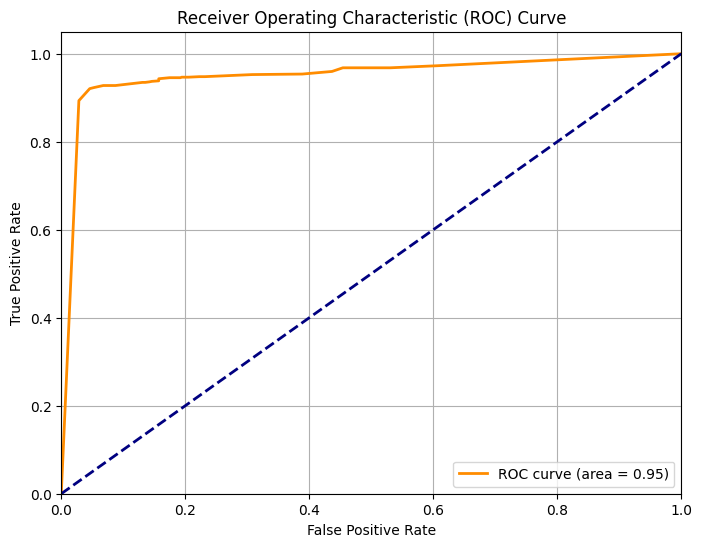

In [ ]:
# bayes_search_dt is best case 
best_model = grid_search_dt

# Get the predicted probabilities for the positive class (1)
y_probs = best_model.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

จาก ROC Graph ยังไม่ค่อยเห็นความแตกต่าง อย่างชัดเจน Grid Search จะมี area ที่ดีกว่านิดหน่อย ยังไม่สามารถสรุปได้

## วิธีที่ 2 Confusion Matrix

#### Precision สูงสุด = Decision Tree แบบ Bayesian Search
- Accuracy: 0.918331670730806 
- recall :  0.9048847105562834 
- Precision :  0.9578657848086113

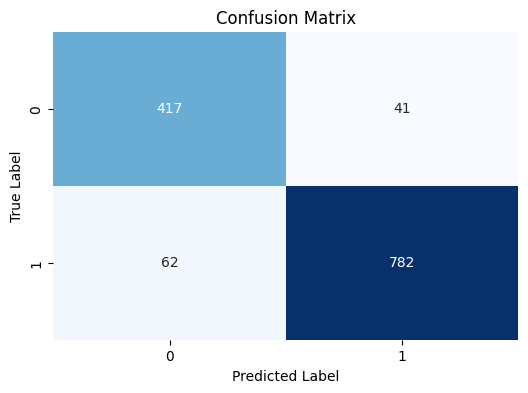

In [ ]:
y_pred = bayes_search_dt.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Accuracy และ Recall สูงสุด = Decision Tree แบบ Grid Search
- Accuracy: 0.9187172097834923 
- recall :  0.9236144289469402 
- Precision :  0.9470085504640334

In [ ]:
y_pred =  grid_search_dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## สรุปผล
โมเดลที่ดีที่สุดคือ Decision Tree แบบ Grid Search
- Accuracy: 0.9187172097834923 
- recall :  0.9236144289469402 
- Precision :  0.9470085504640334

เพราะจะเห็นได้ว่าถึงแม้นจะมี Precision ที่ต่ำกว่า Bayesian Search แต่เป็นปริมาณที่น้อยมาก 1% แทบไม่มีผลกับการทำนาย แต่ค่าของ Recall ที่เพิ่มมา 2% กลับทำให้จากพบผู้ที่ตาย และรอดชีวิตเพิ่มขึ้น ทำให้การทำนายในภาพรวมมีความถูกต้องมากกว่า 

 # 7.Model Discussion (การอภิปรายเกี่ยวกับโมเดล)


### 7.1. Overall Performance (ภาพรวมประสิทธิภาพของโมเดล)
เราได้ทดสอบโมเดลต่างๆ ที่ประกอบด้วย 

1. Random Forest:

- คำอธิบาย: โมเดลการเรียนรู้แบบรวม (ensemble learning) ที่ประกอบด้วยต้นไม้ตัดสินใจหลาย ๆ ต้น (decision trees) 

  และทำการคาดการณ์โดยการใช้การโหวตจากต้นไม้แต่ละต้น

- ข้อดี: สามารถจัดการกับข้อมูลที่มี noise ได้ดีและลดความเสี่ยงจากการ overfitting

2. SVM (Support Vector Machine):

- คำอธิบาย: โมเดลการจำแนกประเภทที่พยายามหาชุดของ hyperplane ที่เหมาะสมที่สุดในการแบ่งกลุ่มข้อมูลออกจากกัน
- ข้อดี: ทำงานได้ดีในกรณีที่มีมิติสูง และสามารถใช้ kernel trick เพื่อจัดการกับข้อมูลที่ไม่เป็นเชิงเส้น

3. Neural Network:

- คำอธิบาย: โมเดลที่เลียนแบบการทำงานของสมองมนุษย์ ประกอบด้วยชั้นของนิวรอนที่เชื่อมโยงกัน
- ข้อดี: สามารถจัดการกับความซับซ้อนได้ดีและมีความสามารถในการเรียนรู้ลักษณะที่ซับซ้อนในข้อมูล

4. Logistic Regression:

- คำอธิบาย: โมเดลเชิงเส้นที่ใช้สำหรับการจำแนกประเภท โดยใช้ฟังก์ชันโลจิสติกในการคาดการณ์ความน่าจะเป็น
- ข้อดี: เข้าใจง่ายและสามารถตีความได้ง่าย เหมาะสำหรับข้อมูลที่มีลักษณะเชิงเส้น

5. Decision Tree:

- คำอธิบาย: โมเดลที่ใช้โครงสร้างแบบต้นไม้ในการตัดสินใจ โดยแบ่งข้อมูลตามคุณสมบัติที่ทำให้ข้อมูลมีความบริสุทธิ์มากที่สุด
- ข้อดี: ง่ายต่อการเข้าใจและตีความ สามารถจัดการกับข้อมูลที่มีค่าหมายเป็นหมวดได้ดี

6. K-Nearest Neighbors (K-NN):

- คำอธิบาย: โมเดลที่ใช้วิธีการเปรียบเทียบโดยการหาค่าที่อยู่ใกล้เคียงที่สุด K ค่าในชุดข้อมูลที่ฝึกสอน
- ข้อดี: ไม่มีการสร้างโมเดลที่ชัดเจนและทำงานได้ดีสำหรับข้อมูลที่มีโครงสร้างซับซ้อน

#### **สรุปผล**

**Target** : เพื่อคาดการณ์ผลลัพธ์ของ death โดยโมเดลทั้งหมดนี้ถูกประเมินด้วยค่าความแม่นยำ (Accuracy), ความสามารถในการจำแนก (Recall), และความแม่นยำของการพยากรณ์ (Precision)

**ผลลัพธ์** : โดยรวมแล้ว Decision Tree ให้ผลลัพธ์ที่ดีที่สุดในด้าน Accuracy, Recall, และ Precision ที่ 0.91 ซึ่งแสดงว่าโมเดลนี้สามารถจำแนกข้อมูลได้ดี Random Forest ก็ทำงานได้ดีเช่นกัน โดยมีค่าความแม่นยำและค่า Recall ใกล้เคียงกับ Decision Tree ที่ 0.89 และ 0.90 ตามลำดับ



### 7.2. Comparison Between Models (การเปรียบเทียบระหว่างโมเดล)

- Decision Tree และ Random Forest ให้ผลลัพธ์ที่ดีที่สุด โดยทั้งสองโมเดลมีค่าความแม่นยำสูงถึง 0.89 ขึ้นไป และค่าสูงสุดที่ 0.91 โดยเฉพาะ Decision Tree ซึ่งอาจเป็นผลมาจากการที่ข้อมูลมีรูปแบบที่ไม่ซับซ้อนเกินไป
- SVM และ Logistic Regression มีค่า Accuracy, Recall, และ Precision ใกล้เคียงกัน โดยประมาณ 0.87 ถึง 0.88
- Neural Network มีความแม่นยำน้อยกว่าโมเดลต้นไม้เล็กน้อย โดยอยู่ที่ 0.86
- K-Nearest Neighbors (K-NN) มีประสิทธิภาพต่ำสุดที่ค่า Accuracy, Recall, และ Precision เพียง 0.78 ซึ่งอาจเกิดจากการที่ K-NN ต้องการข้อมูลที่มีความคล้ายคลึงกันในพื้นที่ที่อยู่ใกล้กัน แต่ข้อมูลในที่นี้อาจไม่สนับสนุนการจำแนกแบบ K-NN